In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import matplotlib
from sklearn.metrics import confusion_matrix
import itertools 

np.set_printoptions(precision=5, suppress=True)

In [2]:
data_path = os.path.dirname(os.path.realpath('')) + '/PA 2/data_prog2Spring18'
train_data_path = data_path + "/train_data"
test_data_path = data_path + "/test_data"
train_labels_path = data_path + "/labels/train_label.txt"
test_labels_path = data_path + "/labels/test_label.txt"

num_train_data = len(os.listdir(train_data_path))
train_data = []
for filename in sorted(os.listdir(train_data_path)):
    image = mpimg.imread(os.path.join(train_data_path, filename))
    train_data.append(image.reshape(784).tolist())

num_test_data = len(os.listdir(test_data_path))
test_data = []
for filename in sorted(os.listdir(test_data_path)):
    image = mpimg.imread(os.path.join(test_data_path, filename))
    test_data.append(image.reshape(784).tolist())

X_train = [[y / 255. for y in x] for x in train_data]
X_test = [[y / 255. for y in x] for x in test_data]

Y_train = []
with open(train_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 10
        tmp[j] = 1.
        Y_train.append(tmp)
    
Y_test = []
with open(test_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 10
        tmp[j] = 1.
        Y_test.append(tmp)

X_train = np.matrix(X_train) 	# 50000 * 784
X_test = np.matrix(X_test)		# 5000 * 784
Y_train = np.matrix(Y_train) 	# 50000 * 10
Y_test = np.matrix(Y_test)	 	# 5000 * 10

In [9]:
def relu(x):
    return np.maximum(x,0)

def relu_prime(x):
    return 1. * (x > 0)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

def cross_entropy_loss(Y_hat, Y):
    return -1 / Y.shape[1] * np.sum(np.multiply(Y, np.log(Y_hat)))

def prediction(y):
    return np.argmax(y, axis = 0)

In [24]:
n_in = 784
n_h1 = 100
n_h2 = 100
n_out = 10

W1 = np.matrix(np.random.rand(n_in, n_h1)) * 0.001    # 784 * 100
b1 = np.matrix(np.random.rand(n_h1, 1)) * 0           # 100 * 1
W2 = np.matrix(np.random.rand(n_h1, n_h2)) * 0.001    # 100 * 100
b2 = np.matrix(np.random.rand(n_h2, 1)) * 0           # 100 * 1
W3 = np.matrix(np.random.rand(n_h2, n_out)) * 0.001   # 100 * 10
b3 = np.matrix(np.random.rand(n_out, 1)) * 0          # 10 * 1

batch_size = 50
lr = 0.1
losses = []
train_accs = []
test_accs = []

for epoch in range(10):
    perm = np.random.permutation(X_train.shape[0]).reshape(-1, batch_size)
    for i in range(len(perm)):
        ind = perm[i]
        X_batch = X_train[ind].T # 784 * 50
        Y_batch = Y_train[ind].T # 10 * 50

        Z1 = W1.T * X_batch + b1
        H1 = relu(Z1) # 100 * 50
        Z2 = W2.T * H1 + b2
        H2 = relu(Z2) # 100 * 50
        Y_hat = softmax(W3.T * H2 + b3) # 10 * 50

        dW3 = (1/batch_size) * H2 * (Y_hat - Y_batch).T # 100 * 10
        db3 = (1/batch_size) * np.sum(Y_hat - Y_batch, axis = 1) # 10 * 1
        dH2 = W3 * (Y_hat - Y_batch) # 100 * 50

        dZ2 = np.multiply(dH2, relu_prime(H2))
        dW2 = (1/batch_size) * H1 * dZ2.T # 100 * 100
        db2 = (1/batch_size) * np.sum(dZ2, axis = 1) # 100 * 1
        dH1 = W2 * dZ2 # 100 * 50

        dZ1 = np.multiply(dH1, relu_prime(H1))
        dW1 = (1/batch_size) * X_batch * dZ1.T # 784 * 100
        db1 = (1/batch_size) * np.sum(dZ1, axis = 1) # 100 * 1

        W1 -= lr * dW1
        bs31 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
        W3 -= lr * dW3
        b3 -= lr * db3
        
        Z1 = W1.T * X_train.T + b1
        H1 = relu(Z1)
        Z2 = W2.T * H1 + b2
        H2 = relu(Z2) 
        Y_hat = softmax(W3.T * H2 + b3) 

        loss = cross_entropy_loss(Y_hat, Y_train.T)
        losses.append(loss)

        train_acc = np.sum(prediction(Y_hat) == prediction(Y_train.T)) / Y_train.shape[0]
        train_accs.append(train_acc)

        Z1 = W1.T * X_test.T + b1
        H1 = relu(Z1)
        Z2 = W2.T * H1 + b2
        H2 = relu(Z2) 
        Y_hat = softmax(W3.T * H2 + b3) 

        test_acc = np.sum(prediction(Y_hat) == prediction(Y_test.T)) / Y_test.shape[0]
        test_accs.append(test_acc)

        print('epoch: {} iter: {:3} loss: {:.5f} training acc: {:.5f} testing acc: {}'.format(epoch+1, i, loss, train_acc, test_acc))

epoch: 1 iter:   0 loss: 2.30264 training acc: 0.09718 testing acc: 0.0968
epoch: 1 iter:   1 loss: 2.30263 training acc: 0.09718 testing acc: 0.0968
epoch: 1 iter:   2 loss: 2.30254 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   3 loss: 2.30266 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   4 loss: 2.30265 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   5 loss: 2.30268 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   6 loss: 2.30264 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   7 loss: 2.30255 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   8 loss: 2.30253 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:   9 loss: 2.30250 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:  10 loss: 2.30243 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:  11 loss: 2.30233 training acc: 0.09976 testing acc: 0.0956
epoch: 1 iter:  12 loss: 2.30227 training acc: 0.09684 testing acc: 0.103
epoch: 1 iter:  13 loss: 2.30232 tr

epoch: 1 iter: 110 loss: 2.30156 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 111 loss: 2.30151 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 112 loss: 2.30148 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 113 loss: 2.30151 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 114 loss: 2.30148 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 115 loss: 2.30144 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 116 loss: 2.30141 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 117 loss: 2.30140 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 118 loss: 2.30133 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 119 loss: 2.30136 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 120 loss: 2.30126 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 121 loss: 2.30123 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 122 loss: 2.30123 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 123 loss: 

epoch: 1 iter: 220 loss: 2.30117 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 221 loss: 2.30119 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 222 loss: 2.30117 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 223 loss: 2.30112 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 224 loss: 2.30112 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 225 loss: 2.30110 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 226 loss: 2.30116 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 227 loss: 2.30115 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 228 loss: 2.30112 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 229 loss: 2.30112 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 230 loss: 2.30110 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 231 loss: 2.30108 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 232 loss: 2.30106 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 233 loss: 

epoch: 1 iter: 330 loss: 2.30138 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 331 loss: 2.30138 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 332 loss: 2.30134 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 333 loss: 2.30127 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 334 loss: 2.30120 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 335 loss: 2.30127 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 336 loss: 2.30132 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 337 loss: 2.30131 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 338 loss: 2.30135 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 339 loss: 2.30126 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 340 loss: 2.30129 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 341 loss: 2.30128 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 342 loss: 2.30124 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 343 loss: 

epoch: 1 iter: 440 loss: 2.29869 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 441 loss: 2.29863 training acc: 0.11356 testing acc: 0.1068
epoch: 1 iter: 442 loss: 2.29864 training acc: 0.11414 testing acc: 0.1074
epoch: 1 iter: 443 loss: 2.29860 training acc: 0.11416 testing acc: 0.1074
epoch: 1 iter: 444 loss: 2.29855 training acc: 0.12436 testing acc: 0.1166
epoch: 1 iter: 445 loss: 2.29856 training acc: 0.17802 testing acc: 0.1708
epoch: 1 iter: 446 loss: 2.29843 training acc: 0.17934 testing acc: 0.172
epoch: 1 iter: 447 loss: 2.29820 training acc: 0.11702 testing acc: 0.1094
epoch: 1 iter: 448 loss: 2.29814 training acc: 0.12454 testing acc: 0.1166
epoch: 1 iter: 449 loss: 2.29799 training acc: 0.11482 testing acc: 0.1076
epoch: 1 iter: 450 loss: 2.29785 training acc: 0.11598 testing acc: 0.1086
epoch: 1 iter: 451 loss: 2.29771 training acc: 0.12590 testing acc: 0.118
epoch: 1 iter: 452 loss: 2.29753 training acc: 0.11936 testing acc: 0.1116
epoch: 1 iter: 453 loss: 2.

epoch: 1 iter: 550 loss: 2.12064 training acc: 0.21216 testing acc: 0.206
epoch: 1 iter: 551 loss: 2.11782 training acc: 0.21344 testing acc: 0.2092
epoch: 1 iter: 552 loss: 2.11503 training acc: 0.21466 testing acc: 0.2094
epoch: 1 iter: 553 loss: 2.11125 training acc: 0.21184 testing acc: 0.2058
epoch: 1 iter: 554 loss: 2.10693 training acc: 0.21406 testing acc: 0.2078
epoch: 1 iter: 555 loss: 2.10239 training acc: 0.21370 testing acc: 0.2084
epoch: 1 iter: 556 loss: 2.09897 training acc: 0.21616 testing acc: 0.2104
epoch: 1 iter: 557 loss: 2.09630 training acc: 0.21674 testing acc: 0.2114
epoch: 1 iter: 558 loss: 2.09463 training acc: 0.21612 testing acc: 0.2106
epoch: 1 iter: 559 loss: 2.09028 training acc: 0.21606 testing acc: 0.2102
epoch: 1 iter: 560 loss: 2.08710 training acc: 0.21712 testing acc: 0.212
epoch: 1 iter: 561 loss: 2.08323 training acc: 0.21614 testing acc: 0.2106
epoch: 1 iter: 562 loss: 2.08085 training acc: 0.21684 testing acc: 0.2106
epoch: 1 iter: 563 loss: 2.

epoch: 1 iter: 660 loss: 1.89348 training acc: 0.24474 testing acc: 0.2444
epoch: 1 iter: 661 loss: 1.89617 training acc: 0.24114 testing acc: 0.2402
epoch: 1 iter: 662 loss: 1.89610 training acc: 0.23994 testing acc: 0.2366
epoch: 1 iter: 663 loss: 1.89366 training acc: 0.24342 testing acc: 0.2424
epoch: 1 iter: 664 loss: 1.89862 training acc: 0.25424 testing acc: 0.251
epoch: 1 iter: 665 loss: 1.89450 training acc: 0.27020 testing acc: 0.2682
epoch: 1 iter: 666 loss: 1.89237 training acc: 0.26528 testing acc: 0.264
epoch: 1 iter: 667 loss: 1.90696 training acc: 0.27380 testing acc: 0.2686
epoch: 1 iter: 668 loss: 1.89127 training acc: 0.26686 testing acc: 0.2648
epoch: 1 iter: 669 loss: 1.88534 training acc: 0.25478 testing acc: 0.2562
epoch: 1 iter: 670 loss: 1.89923 training acc: 0.23064 testing acc: 0.222
epoch: 1 iter: 671 loss: 1.88507 training acc: 0.26326 testing acc: 0.2648
epoch: 1 iter: 672 loss: 1.88045 training acc: 0.25080 testing acc: 0.2534
epoch: 1 iter: 673 loss: 1.8

epoch: 1 iter: 770 loss: 1.82401 training acc: 0.26856 testing acc: 0.2696
epoch: 1 iter: 771 loss: 1.81171 training acc: 0.27814 testing acc: 0.2772
epoch: 1 iter: 772 loss: 1.81295 training acc: 0.27620 testing acc: 0.2806
epoch: 1 iter: 773 loss: 1.80595 training acc: 0.27876 testing acc: 0.279
epoch: 1 iter: 774 loss: 1.81227 training acc: 0.27268 testing acc: 0.2754
epoch: 1 iter: 775 loss: 1.80559 training acc: 0.27480 testing acc: 0.2748
epoch: 1 iter: 776 loss: 1.80908 training acc: 0.27920 testing acc: 0.2772
epoch: 1 iter: 777 loss: 1.80856 training acc: 0.25680 testing acc: 0.256
epoch: 1 iter: 778 loss: 1.80557 training acc: 0.28542 testing acc: 0.2838
epoch: 1 iter: 779 loss: 1.80410 training acc: 0.27870 testing acc: 0.2782
epoch: 1 iter: 780 loss: 1.83890 training acc: 0.23546 testing acc: 0.2328
epoch: 1 iter: 781 loss: 1.83455 training acc: 0.23510 testing acc: 0.2308
epoch: 1 iter: 782 loss: 1.83369 training acc: 0.22476 testing acc: 0.2222
epoch: 1 iter: 783 loss: 1.

epoch: 1 iter: 880 loss: 1.75958 training acc: 0.29344 testing acc: 0.2946
epoch: 1 iter: 881 loss: 1.77770 training acc: 0.29122 testing acc: 0.294
epoch: 1 iter: 882 loss: 1.75471 training acc: 0.29384 testing acc: 0.2942
epoch: 1 iter: 883 loss: 1.74922 training acc: 0.27708 testing acc: 0.2796
epoch: 1 iter: 884 loss: 1.75287 training acc: 0.29828 testing acc: 0.3016
epoch: 1 iter: 885 loss: 1.74636 training acc: 0.29398 testing acc: 0.295
epoch: 1 iter: 886 loss: 1.74686 training acc: 0.28922 testing acc: 0.286
epoch: 1 iter: 887 loss: 1.75572 training acc: 0.29048 testing acc: 0.2936
epoch: 1 iter: 888 loss: 1.75185 training acc: 0.29340 testing acc: 0.2946
epoch: 1 iter: 889 loss: 1.75744 training acc: 0.26986 testing acc: 0.276
epoch: 1 iter: 890 loss: 1.75461 training acc: 0.27786 testing acc: 0.2772
epoch: 1 iter: 891 loss: 1.76997 training acc: 0.26660 testing acc: 0.2684
epoch: 1 iter: 892 loss: 1.76304 training acc: 0.26710 testing acc: 0.2696
epoch: 1 iter: 893 loss: 1.75

epoch: 1 iter: 990 loss: 1.70590 training acc: 0.28216 testing acc: 0.2874
epoch: 1 iter: 991 loss: 1.70939 training acc: 0.29216 testing acc: 0.2928
epoch: 1 iter: 992 loss: 1.71427 training acc: 0.29188 testing acc: 0.29
epoch: 1 iter: 993 loss: 1.71640 training acc: 0.29780 testing acc: 0.296
epoch: 1 iter: 994 loss: 1.71438 training acc: 0.29726 testing acc: 0.2956
epoch: 1 iter: 995 loss: 1.73888 training acc: 0.27648 testing acc: 0.2764
epoch: 1 iter: 996 loss: 1.71596 training acc: 0.29692 testing acc: 0.2956
epoch: 1 iter: 997 loss: 1.70823 training acc: 0.30148 testing acc: 0.2996
epoch: 1 iter: 998 loss: 1.71539 training acc: 0.29932 testing acc: 0.3012
epoch: 1 iter: 999 loss: 1.70853 training acc: 0.29972 testing acc: 0.297
epoch: 2 iter:   0 loss: 1.72729 training acc: 0.28738 testing acc: 0.2914
epoch: 2 iter:   1 loss: 1.71087 training acc: 0.30042 testing acc: 0.3048
epoch: 2 iter:   2 loss: 1.70742 training acc: 0.30194 testing acc: 0.303
epoch: 2 iter:   3 loss: 1.713

epoch: 2 iter: 100 loss: 1.67408 training acc: 0.30560 testing acc: 0.307
epoch: 2 iter: 101 loss: 1.67803 training acc: 0.29764 testing acc: 0.2982
epoch: 2 iter: 102 loss: 1.67340 training acc: 0.30254 testing acc: 0.303
epoch: 2 iter: 103 loss: 1.66972 training acc: 0.29520 testing acc: 0.2994
epoch: 2 iter: 104 loss: 1.68886 training acc: 0.28288 testing acc: 0.2826
epoch: 2 iter: 105 loss: 1.67987 training acc: 0.28416 testing acc: 0.2848
epoch: 2 iter: 106 loss: 1.67338 training acc: 0.30154 testing acc: 0.3034
epoch: 2 iter: 107 loss: 1.67167 training acc: 0.30314 testing acc: 0.3052
epoch: 2 iter: 108 loss: 1.68377 training acc: 0.29450 testing acc: 0.2928
epoch: 2 iter: 109 loss: 1.67189 training acc: 0.30660 testing acc: 0.3024
epoch: 2 iter: 110 loss: 1.66954 training acc: 0.30198 testing acc: 0.3004
epoch: 2 iter: 111 loss: 1.67248 training acc: 0.30438 testing acc: 0.3058
epoch: 2 iter: 112 loss: 1.68786 training acc: 0.30416 testing acc: 0.3086
epoch: 2 iter: 113 loss: 1.

epoch: 2 iter: 210 loss: 1.63980 training acc: 0.32014 testing acc: 0.3202
epoch: 2 iter: 211 loss: 1.66838 training acc: 0.30268 testing acc: 0.3012
epoch: 2 iter: 212 loss: 1.66086 training acc: 0.30838 testing acc: 0.3134
epoch: 2 iter: 213 loss: 1.64331 training acc: 0.31420 testing acc: 0.3162
epoch: 2 iter: 214 loss: 1.64407 training acc: 0.31662 testing acc: 0.3144
epoch: 2 iter: 215 loss: 1.64869 training acc: 0.32046 testing acc: 0.3208
epoch: 2 iter: 216 loss: 1.66879 training acc: 0.31180 testing acc: 0.3124
epoch: 2 iter: 217 loss: 1.65936 training acc: 0.31296 testing acc: 0.3174
epoch: 2 iter: 218 loss: 1.64444 training acc: 0.31284 testing acc: 0.3166
epoch: 2 iter: 219 loss: 1.64977 training acc: 0.30760 testing acc: 0.31
epoch: 2 iter: 220 loss: 1.64443 training acc: 0.30344 testing acc: 0.3026
epoch: 2 iter: 221 loss: 1.65893 training acc: 0.29648 testing acc: 0.2966
epoch: 2 iter: 222 loss: 1.65015 training acc: 0.31204 testing acc: 0.3076
epoch: 2 iter: 223 loss: 1.

epoch: 2 iter: 320 loss: 1.61259 training acc: 0.31470 testing acc: 0.3108
epoch: 2 iter: 321 loss: 1.62019 training acc: 0.30342 testing acc: 0.3048
epoch: 2 iter: 322 loss: 1.61768 training acc: 0.30408 testing acc: 0.3054
epoch: 2 iter: 323 loss: 1.61282 training acc: 0.31348 testing acc: 0.316
epoch: 2 iter: 324 loss: 1.60548 training acc: 0.32500 testing acc: 0.3244
epoch: 2 iter: 325 loss: 1.60547 training acc: 0.30854 testing acc: 0.3062
epoch: 2 iter: 326 loss: 1.61279 training acc: 0.31404 testing acc: 0.3154
epoch: 2 iter: 327 loss: 1.59745 training acc: 0.31794 testing acc: 0.3192
epoch: 2 iter: 328 loss: 1.60165 training acc: 0.31450 testing acc: 0.3174
epoch: 2 iter: 329 loss: 1.61475 training acc: 0.30316 testing acc: 0.3034
epoch: 2 iter: 330 loss: 1.62240 training acc: 0.31132 testing acc: 0.3126
epoch: 2 iter: 331 loss: 1.60138 training acc: 0.31066 testing acc: 0.3106
epoch: 2 iter: 332 loss: 1.61166 training acc: 0.31150 testing acc: 0.3096
epoch: 2 iter: 333 loss: 1

epoch: 2 iter: 430 loss: 1.53098 training acc: 0.37748 testing acc: 0.3814
epoch: 2 iter: 431 loss: 1.52276 training acc: 0.38450 testing acc: 0.3874
epoch: 2 iter: 432 loss: 1.51567 training acc: 0.40032 testing acc: 0.4052
epoch: 2 iter: 433 loss: 1.51452 training acc: 0.38628 testing acc: 0.3926
epoch: 2 iter: 434 loss: 1.51784 training acc: 0.34696 testing acc: 0.3422
epoch: 2 iter: 435 loss: 1.51474 training acc: 0.35454 testing acc: 0.3514
epoch: 2 iter: 436 loss: 1.50977 training acc: 0.35784 testing acc: 0.358
epoch: 2 iter: 437 loss: 1.51478 training acc: 0.36298 testing acc: 0.3566
epoch: 2 iter: 438 loss: 1.51120 training acc: 0.39322 testing acc: 0.3928
epoch: 2 iter: 439 loss: 1.50730 training acc: 0.36522 testing acc: 0.364
epoch: 2 iter: 440 loss: 1.51036 training acc: 0.35532 testing acc: 0.3586
epoch: 2 iter: 441 loss: 1.50138 training acc: 0.37490 testing acc: 0.3748
epoch: 2 iter: 442 loss: 1.49855 training acc: 0.36684 testing acc: 0.3668
epoch: 2 iter: 443 loss: 1.

epoch: 2 iter: 540 loss: 1.38557 training acc: 0.41134 testing acc: 0.4174
epoch: 2 iter: 541 loss: 1.37623 training acc: 0.40774 testing acc: 0.409
epoch: 2 iter: 542 loss: 1.37656 training acc: 0.41720 testing acc: 0.4144
epoch: 2 iter: 543 loss: 1.37390 training acc: 0.41910 testing acc: 0.4164
epoch: 2 iter: 544 loss: 1.36858 training acc: 0.42898 testing acc: 0.4332
epoch: 2 iter: 545 loss: 1.37168 training acc: 0.41198 testing acc: 0.4074
epoch: 2 iter: 546 loss: 1.39134 training acc: 0.42594 testing acc: 0.4212
epoch: 2 iter: 547 loss: 1.37026 training acc: 0.42946 testing acc: 0.4266
epoch: 2 iter: 548 loss: 1.36858 training acc: 0.43066 testing acc: 0.4302
epoch: 2 iter: 549 loss: 1.37131 training acc: 0.43238 testing acc: 0.4316
epoch: 2 iter: 550 loss: 1.37613 training acc: 0.43262 testing acc: 0.4324
epoch: 2 iter: 551 loss: 1.36551 training acc: 0.43546 testing acc: 0.4314
epoch: 2 iter: 552 loss: 1.36747 training acc: 0.43088 testing acc: 0.4266
epoch: 2 iter: 553 loss: 1

epoch: 2 iter: 650 loss: 1.32128 training acc: 0.44208 testing acc: 0.4428
epoch: 2 iter: 651 loss: 1.32146 training acc: 0.44264 testing acc: 0.436
epoch: 2 iter: 652 loss: 1.32746 training acc: 0.47136 testing acc: 0.4702
epoch: 2 iter: 653 loss: 1.31199 training acc: 0.46402 testing acc: 0.4594
epoch: 2 iter: 654 loss: 1.32241 training acc: 0.44532 testing acc: 0.4462
epoch: 2 iter: 655 loss: 1.31436 training acc: 0.46970 testing acc: 0.4668
epoch: 2 iter: 656 loss: 1.31881 training acc: 0.46074 testing acc: 0.4554
epoch: 2 iter: 657 loss: 1.32595 training acc: 0.43764 testing acc: 0.4408
epoch: 2 iter: 658 loss: 1.30307 training acc: 0.46226 testing acc: 0.4548
epoch: 2 iter: 659 loss: 1.30170 training acc: 0.44884 testing acc: 0.4524
epoch: 2 iter: 660 loss: 1.30077 training acc: 0.45612 testing acc: 0.4586
epoch: 2 iter: 661 loss: 1.30453 training acc: 0.46822 testing acc: 0.4708
epoch: 2 iter: 662 loss: 1.31321 training acc: 0.44250 testing acc: 0.4398
epoch: 2 iter: 663 loss: 1

epoch: 2 iter: 760 loss: 1.20805 training acc: 0.50764 testing acc: 0.5016
epoch: 2 iter: 761 loss: 1.20739 training acc: 0.54302 testing acc: 0.5346
epoch: 2 iter: 762 loss: 1.20476 training acc: 0.54464 testing acc: 0.5384
epoch: 2 iter: 763 loss: 1.19816 training acc: 0.54460 testing acc: 0.534
epoch: 2 iter: 764 loss: 1.22166 training acc: 0.52006 testing acc: 0.5254
epoch: 2 iter: 765 loss: 1.19898 training acc: 0.54810 testing acc: 0.5398
epoch: 2 iter: 766 loss: 1.19784 training acc: 0.54948 testing acc: 0.5382
epoch: 2 iter: 767 loss: 1.19833 training acc: 0.54110 testing acc: 0.5334
epoch: 2 iter: 768 loss: 1.19487 training acc: 0.52070 testing acc: 0.5066
epoch: 2 iter: 769 loss: 1.19130 training acc: 0.53566 testing acc: 0.5288
epoch: 2 iter: 770 loss: 1.19674 training acc: 0.54416 testing acc: 0.5406
epoch: 2 iter: 771 loss: 1.20701 training acc: 0.54270 testing acc: 0.534
epoch: 2 iter: 772 loss: 1.18614 training acc: 0.54174 testing acc: 0.54
epoch: 2 iter: 773 loss: 1.18

epoch: 2 iter: 870 loss: 0.98439 training acc: 0.62202 testing acc: 0.6228
epoch: 2 iter: 871 loss: 0.98532 training acc: 0.63020 testing acc: 0.6316
epoch: 2 iter: 872 loss: 0.99014 training acc: 0.62796 testing acc: 0.6294
epoch: 2 iter: 873 loss: 1.00093 training acc: 0.62492 testing acc: 0.6212
epoch: 2 iter: 874 loss: 0.97486 training acc: 0.62550 testing acc: 0.624
epoch: 2 iter: 875 loss: 0.98165 training acc: 0.62278 testing acc: 0.6208
epoch: 2 iter: 876 loss: 0.97169 training acc: 0.63432 testing acc: 0.6334
epoch: 2 iter: 877 loss: 0.96579 training acc: 0.63344 testing acc: 0.6346
epoch: 2 iter: 878 loss: 0.96283 training acc: 0.62292 testing acc: 0.6168
epoch: 2 iter: 879 loss: 0.97672 training acc: 0.61422 testing acc: 0.6054
epoch: 2 iter: 880 loss: 0.95479 training acc: 0.63334 testing acc: 0.6336
epoch: 2 iter: 881 loss: 0.95856 training acc: 0.62926 testing acc: 0.6282
epoch: 2 iter: 882 loss: 0.96713 training acc: 0.63656 testing acc: 0.6362
epoch: 2 iter: 883 loss: 0

epoch: 2 iter: 980 loss: 0.82367 training acc: 0.71616 testing acc: 0.7158
epoch: 2 iter: 981 loss: 0.79969 training acc: 0.73494 testing acc: 0.7364
epoch: 2 iter: 982 loss: 0.84026 training acc: 0.72430 testing acc: 0.7208
epoch: 2 iter: 983 loss: 0.83386 training acc: 0.72800 testing acc: 0.725
epoch: 2 iter: 984 loss: 0.79626 training acc: 0.74318 testing acc: 0.743
epoch: 2 iter: 985 loss: 0.79248 training acc: 0.73796 testing acc: 0.7358
epoch: 2 iter: 986 loss: 0.79855 training acc: 0.72620 testing acc: 0.7278
epoch: 2 iter: 987 loss: 0.80809 training acc: 0.72784 testing acc: 0.7276
epoch: 2 iter: 988 loss: 0.79447 training acc: 0.73238 testing acc: 0.7316
epoch: 2 iter: 989 loss: 0.84769 training acc: 0.71538 testing acc: 0.7134
epoch: 2 iter: 990 loss: 0.78998 training acc: 0.73800 testing acc: 0.7402
epoch: 2 iter: 991 loss: 0.80149 training acc: 0.73828 testing acc: 0.738
epoch: 2 iter: 992 loss: 0.81287 training acc: 0.73604 testing acc: 0.733
epoch: 2 iter: 993 loss: 0.78

epoch: 3 iter:  90 loss: 0.61349 training acc: 0.83310 testing acc: 0.8326
epoch: 3 iter:  91 loss: 0.64048 training acc: 0.82926 testing acc: 0.8334
epoch: 3 iter:  92 loss: 0.67180 training acc: 0.80988 testing acc: 0.8078
epoch: 3 iter:  93 loss: 0.62130 training acc: 0.82198 testing acc: 0.8194
epoch: 3 iter:  94 loss: 0.60993 training acc: 0.83532 testing acc: 0.8338
epoch: 3 iter:  95 loss: 0.63456 training acc: 0.80602 testing acc: 0.8112
epoch: 3 iter:  96 loss: 0.64012 training acc: 0.81958 testing acc: 0.813
epoch: 3 iter:  97 loss: 0.62689 training acc: 0.80948 testing acc: 0.8084
epoch: 3 iter:  98 loss: 0.61617 training acc: 0.81570 testing acc: 0.8168
epoch: 3 iter:  99 loss: 0.61864 training acc: 0.81468 testing acc: 0.8168
epoch: 3 iter: 100 loss: 0.60751 training acc: 0.81476 testing acc: 0.8164
epoch: 3 iter: 101 loss: 0.60628 training acc: 0.80538 testing acc: 0.8058
epoch: 3 iter: 102 loss: 0.60443 training acc: 0.80010 testing acc: 0.8004
epoch: 3 iter: 103 loss: 0

epoch: 3 iter: 200 loss: 0.53663 training acc: 0.85796 testing acc: 0.8508
epoch: 3 iter: 201 loss: 0.49821 training acc: 0.87698 testing acc: 0.8698
epoch: 3 iter: 202 loss: 0.50095 training acc: 0.87328 testing acc: 0.8718
epoch: 3 iter: 203 loss: 0.52925 training acc: 0.86590 testing acc: 0.8622
epoch: 3 iter: 204 loss: 0.53935 training acc: 0.86170 testing acc: 0.8564
epoch: 3 iter: 205 loss: 0.49705 training acc: 0.87488 testing acc: 0.8686
epoch: 3 iter: 206 loss: 0.50083 training acc: 0.87386 testing acc: 0.8734
epoch: 3 iter: 207 loss: 0.50946 training acc: 0.86996 testing acc: 0.8664
epoch: 3 iter: 208 loss: 0.49325 training acc: 0.87766 testing acc: 0.8718
epoch: 3 iter: 209 loss: 0.49291 training acc: 0.87736 testing acc: 0.8696
epoch: 3 iter: 210 loss: 0.55325 training acc: 0.85432 testing acc: 0.8506
epoch: 3 iter: 211 loss: 0.49720 training acc: 0.86972 testing acc: 0.8626
epoch: 3 iter: 212 loss: 0.50389 training acc: 0.87144 testing acc: 0.868
epoch: 3 iter: 213 loss: 0

epoch: 3 iter: 310 loss: 0.41358 training acc: 0.89108 testing acc: 0.8826
epoch: 3 iter: 311 loss: 0.40626 training acc: 0.89098 testing acc: 0.8838
epoch: 3 iter: 312 loss: 0.41276 training acc: 0.88790 testing acc: 0.8776
epoch: 3 iter: 313 loss: 0.40572 training acc: 0.89230 testing acc: 0.8822
epoch: 3 iter: 314 loss: 0.41160 training acc: 0.89248 testing acc: 0.885
epoch: 3 iter: 315 loss: 0.42325 training acc: 0.88610 testing acc: 0.88
epoch: 3 iter: 316 loss: 0.40170 training acc: 0.89440 testing acc: 0.8866
epoch: 3 iter: 317 loss: 0.40379 training acc: 0.89148 testing acc: 0.8836
epoch: 3 iter: 318 loss: 0.42061 training acc: 0.88492 testing acc: 0.8776
epoch: 3 iter: 319 loss: 0.42206 training acc: 0.88176 testing acc: 0.8742
epoch: 3 iter: 320 loss: 0.40740 training acc: 0.88840 testing acc: 0.8776
epoch: 3 iter: 321 loss: 0.40635 training acc: 0.89246 testing acc: 0.8864
epoch: 3 iter: 322 loss: 0.46668 training acc: 0.86444 testing acc: 0.8562
epoch: 3 iter: 323 loss: 0.6

epoch: 3 iter: 420 loss: 0.36355 training acc: 0.90372 testing acc: 0.8938
epoch: 3 iter: 421 loss: 0.35709 training acc: 0.90184 testing acc: 0.8922
epoch: 3 iter: 422 loss: 0.37905 training acc: 0.89142 testing acc: 0.8856
epoch: 3 iter: 423 loss: 0.37757 training acc: 0.89274 testing acc: 0.884
epoch: 3 iter: 424 loss: 0.38443 training acc: 0.89072 testing acc: 0.8794
epoch: 3 iter: 425 loss: 0.35555 training acc: 0.90402 testing acc: 0.8918
epoch: 3 iter: 426 loss: 0.36978 training acc: 0.89534 testing acc: 0.8848
epoch: 3 iter: 427 loss: 0.41590 training acc: 0.87756 testing acc: 0.8692
epoch: 3 iter: 428 loss: 0.43740 training acc: 0.87944 testing acc: 0.8666
epoch: 3 iter: 429 loss: 0.39205 training acc: 0.88758 testing acc: 0.8776
epoch: 3 iter: 430 loss: 0.36110 training acc: 0.90038 testing acc: 0.89
epoch: 3 iter: 431 loss: 0.36411 training acc: 0.89758 testing acc: 0.8908
epoch: 3 iter: 432 loss: 0.36147 training acc: 0.89858 testing acc: 0.892
epoch: 3 iter: 433 loss: 0.37

epoch: 3 iter: 530 loss: 0.39487 training acc: 0.87966 testing acc: 0.876
epoch: 3 iter: 531 loss: 0.38927 training acc: 0.88088 testing acc: 0.875
epoch: 3 iter: 532 loss: 0.35493 training acc: 0.89594 testing acc: 0.8906
epoch: 3 iter: 533 loss: 0.31370 training acc: 0.91350 testing acc: 0.9044
epoch: 3 iter: 534 loss: 0.32410 training acc: 0.90988 testing acc: 0.9028
epoch: 3 iter: 535 loss: 0.31496 training acc: 0.91384 testing acc: 0.9082
epoch: 3 iter: 536 loss: 0.32993 training acc: 0.91032 testing acc: 0.9064
epoch: 3 iter: 537 loss: 0.33628 training acc: 0.91048 testing acc: 0.9036
epoch: 3 iter: 538 loss: 0.34544 training acc: 0.90856 testing acc: 0.8986
epoch: 3 iter: 539 loss: 0.31696 training acc: 0.91442 testing acc: 0.9052
epoch: 3 iter: 540 loss: 0.31767 training acc: 0.91338 testing acc: 0.9044
epoch: 3 iter: 541 loss: 0.31541 training acc: 0.91286 testing acc: 0.9028
epoch: 3 iter: 542 loss: 0.33644 training acc: 0.90302 testing acc: 0.8902
epoch: 3 iter: 543 loss: 0.

epoch: 3 iter: 640 loss: 0.28740 training acc: 0.91878 testing acc: 0.915
epoch: 3 iter: 641 loss: 0.29966 training acc: 0.91380 testing acc: 0.9072
epoch: 3 iter: 642 loss: 0.30400 training acc: 0.91394 testing acc: 0.9072
epoch: 3 iter: 643 loss: 0.29912 training acc: 0.91668 testing acc: 0.9082
epoch: 3 iter: 644 loss: 0.29629 training acc: 0.91480 testing acc: 0.9084
epoch: 3 iter: 645 loss: 0.32044 training acc: 0.90638 testing acc: 0.8956
epoch: 3 iter: 646 loss: 0.30362 training acc: 0.91346 testing acc: 0.9022
epoch: 3 iter: 647 loss: 0.32575 training acc: 0.90336 testing acc: 0.8932
epoch: 3 iter: 648 loss: 0.30334 training acc: 0.91214 testing acc: 0.9042
epoch: 3 iter: 649 loss: 0.30064 training acc: 0.91384 testing acc: 0.904
epoch: 3 iter: 650 loss: 0.29781 training acc: 0.91554 testing acc: 0.9088
epoch: 3 iter: 651 loss: 0.28864 training acc: 0.91954 testing acc: 0.9092
epoch: 3 iter: 652 loss: 0.30312 training acc: 0.91628 testing acc: 0.906
epoch: 3 iter: 653 loss: 0.3

epoch: 3 iter: 750 loss: 0.27622 training acc: 0.92224 testing acc: 0.915
epoch: 3 iter: 751 loss: 0.27326 training acc: 0.92310 testing acc: 0.915
epoch: 3 iter: 752 loss: 0.27506 training acc: 0.92326 testing acc: 0.914
epoch: 3 iter: 753 loss: 0.26779 training acc: 0.92280 testing acc: 0.9142
epoch: 3 iter: 754 loss: 0.26635 training acc: 0.92414 testing acc: 0.9164
epoch: 3 iter: 755 loss: 0.30465 training acc: 0.90990 testing acc: 0.9022
epoch: 3 iter: 756 loss: 0.28216 training acc: 0.91862 testing acc: 0.9114
epoch: 3 iter: 757 loss: 0.27881 training acc: 0.91850 testing acc: 0.911
epoch: 3 iter: 758 loss: 0.28092 training acc: 0.91752 testing acc: 0.9108
epoch: 3 iter: 759 loss: 0.27123 training acc: 0.92364 testing acc: 0.918
epoch: 3 iter: 760 loss: 0.27196 training acc: 0.92198 testing acc: 0.916
epoch: 3 iter: 761 loss: 0.27823 training acc: 0.92024 testing acc: 0.9134
epoch: 3 iter: 762 loss: 0.27859 training acc: 0.92122 testing acc: 0.9154
epoch: 3 iter: 763 loss: 0.2868

epoch: 3 iter: 860 loss: 0.24940 training acc: 0.92898 testing acc: 0.9218
epoch: 3 iter: 861 loss: 0.26910 training acc: 0.92450 testing acc: 0.9176
epoch: 3 iter: 862 loss: 0.27012 training acc: 0.92506 testing acc: 0.9192
epoch: 3 iter: 863 loss: 0.24842 training acc: 0.92958 testing acc: 0.9238
epoch: 3 iter: 864 loss: 0.25007 training acc: 0.92746 testing acc: 0.9234
epoch: 3 iter: 865 loss: 0.29861 training acc: 0.91252 testing acc: 0.906
epoch: 3 iter: 866 loss: 0.27772 training acc: 0.91940 testing acc: 0.9138
epoch: 3 iter: 867 loss: 0.25128 training acc: 0.92824 testing acc: 0.922
epoch: 3 iter: 868 loss: 0.25372 training acc: 0.92910 testing acc: 0.924
epoch: 3 iter: 869 loss: 0.24588 training acc: 0.92882 testing acc: 0.9206
epoch: 3 iter: 870 loss: 0.28586 training acc: 0.91860 testing acc: 0.9108
epoch: 3 iter: 871 loss: 0.25031 training acc: 0.92906 testing acc: 0.9266
epoch: 3 iter: 872 loss: 0.27510 training acc: 0.92004 testing acc: 0.913
epoch: 3 iter: 873 loss: 0.27

epoch: 3 iter: 970 loss: 0.23136 training acc: 0.93424 testing acc: 0.9276
epoch: 3 iter: 971 loss: 0.22831 training acc: 0.93466 testing acc: 0.9266
epoch: 3 iter: 972 loss: 0.23193 training acc: 0.93324 testing acc: 0.9266
epoch: 3 iter: 973 loss: 0.23628 training acc: 0.93168 testing acc: 0.924
epoch: 3 iter: 974 loss: 0.25463 training acc: 0.92546 testing acc: 0.9166
epoch: 3 iter: 975 loss: 0.24043 training acc: 0.93162 testing acc: 0.9236
epoch: 3 iter: 976 loss: 0.29169 training acc: 0.91216 testing acc: 0.9034
epoch: 3 iter: 977 loss: 0.23508 training acc: 0.93316 testing acc: 0.9226
epoch: 3 iter: 978 loss: 0.23256 training acc: 0.93550 testing acc: 0.9278
epoch: 3 iter: 979 loss: 0.22673 training acc: 0.93726 testing acc: 0.9306
epoch: 3 iter: 980 loss: 0.23808 training acc: 0.93140 testing acc: 0.9212
epoch: 3 iter: 981 loss: 0.26152 training acc: 0.92268 testing acc: 0.9152
epoch: 3 iter: 982 loss: 0.23494 training acc: 0.93272 testing acc: 0.9242
epoch: 3 iter: 983 loss: 0

epoch: 4 iter:  80 loss: 0.23339 training acc: 0.93214 testing acc: 0.9246
epoch: 4 iter:  81 loss: 0.23886 training acc: 0.93154 testing acc: 0.9206
epoch: 4 iter:  82 loss: 0.24943 training acc: 0.92856 testing acc: 0.9164
epoch: 4 iter:  83 loss: 0.25062 training acc: 0.92728 testing acc: 0.9158
epoch: 4 iter:  84 loss: 0.22072 training acc: 0.93616 testing acc: 0.9276
epoch: 4 iter:  85 loss: 0.22505 training acc: 0.93540 testing acc: 0.9276
epoch: 4 iter:  86 loss: 0.23329 training acc: 0.93292 testing acc: 0.9204
epoch: 4 iter:  87 loss: 0.22614 training acc: 0.93506 testing acc: 0.9214
epoch: 4 iter:  88 loss: 0.21991 training acc: 0.93718 testing acc: 0.9268
epoch: 4 iter:  89 loss: 0.22857 training acc: 0.93296 testing acc: 0.923
epoch: 4 iter:  90 loss: 0.22620 training acc: 0.93634 testing acc: 0.9256
epoch: 4 iter:  91 loss: 0.22233 training acc: 0.93662 testing acc: 0.9254
epoch: 4 iter:  92 loss: 0.21576 training acc: 0.93746 testing acc: 0.9306
epoch: 4 iter:  93 loss: 0

epoch: 4 iter: 190 loss: 0.21620 training acc: 0.93934 testing acc: 0.9362
epoch: 4 iter: 191 loss: 0.22579 training acc: 0.93516 testing acc: 0.931
epoch: 4 iter: 192 loss: 0.22227 training acc: 0.93422 testing acc: 0.9274
epoch: 4 iter: 193 loss: 0.21403 training acc: 0.93860 testing acc: 0.9344
epoch: 4 iter: 194 loss: 0.21023 training acc: 0.94084 testing acc: 0.9366
epoch: 4 iter: 195 loss: 0.21489 training acc: 0.93908 testing acc: 0.9342
epoch: 4 iter: 196 loss: 0.21220 training acc: 0.94026 testing acc: 0.9356
epoch: 4 iter: 197 loss: 0.21312 training acc: 0.94050 testing acc: 0.9372
epoch: 4 iter: 198 loss: 0.21945 training acc: 0.93840 testing acc: 0.9348
epoch: 4 iter: 199 loss: 0.23041 training acc: 0.93122 testing acc: 0.927
epoch: 4 iter: 200 loss: 0.23001 training acc: 0.93328 testing acc: 0.924
epoch: 4 iter: 201 loss: 0.22413 training acc: 0.93398 testing acc: 0.932
epoch: 4 iter: 202 loss: 0.21053 training acc: 0.93978 testing acc: 0.936
epoch: 4 iter: 203 loss: 0.219

epoch: 4 iter: 300 loss: 0.20785 training acc: 0.94232 testing acc: 0.9384
epoch: 4 iter: 301 loss: 0.20602 training acc: 0.94258 testing acc: 0.9388
epoch: 4 iter: 302 loss: 0.20816 training acc: 0.94206 testing acc: 0.9392
epoch: 4 iter: 303 loss: 0.21634 training acc: 0.93956 testing acc: 0.9364
epoch: 4 iter: 304 loss: 0.21486 training acc: 0.93936 testing acc: 0.9334
epoch: 4 iter: 305 loss: 0.22134 training acc: 0.93602 testing acc: 0.9314
epoch: 4 iter: 306 loss: 0.20616 training acc: 0.94162 testing acc: 0.9366
epoch: 4 iter: 307 loss: 0.22259 training acc: 0.93388 testing acc: 0.9266
epoch: 4 iter: 308 loss: 0.23011 training acc: 0.93026 testing acc: 0.924
epoch: 4 iter: 309 loss: 0.20422 training acc: 0.93990 testing acc: 0.9314
epoch: 4 iter: 310 loss: 0.20466 training acc: 0.94008 testing acc: 0.9352
epoch: 4 iter: 311 loss: 0.20460 training acc: 0.94160 testing acc: 0.932
epoch: 4 iter: 312 loss: 0.21747 training acc: 0.93700 testing acc: 0.9264
epoch: 4 iter: 313 loss: 0.

epoch: 4 iter: 410 loss: 0.19487 training acc: 0.94570 testing acc: 0.939
epoch: 4 iter: 411 loss: 0.19515 training acc: 0.94506 testing acc: 0.9364
epoch: 4 iter: 412 loss: 0.23530 training acc: 0.93256 testing acc: 0.9254
epoch: 4 iter: 413 loss: 0.21418 training acc: 0.93898 testing acc: 0.9322
epoch: 4 iter: 414 loss: 0.19552 training acc: 0.94524 testing acc: 0.941
epoch: 4 iter: 415 loss: 0.21110 training acc: 0.94016 testing acc: 0.939
epoch: 4 iter: 416 loss: 0.20312 training acc: 0.94262 testing acc: 0.9408
epoch: 4 iter: 417 loss: 0.19808 training acc: 0.94310 testing acc: 0.9382
epoch: 4 iter: 418 loss: 0.20098 training acc: 0.94272 testing acc: 0.9374
epoch: 4 iter: 419 loss: 0.21711 training acc: 0.93822 testing acc: 0.9326
epoch: 4 iter: 420 loss: 0.21099 training acc: 0.93830 testing acc: 0.929
epoch: 4 iter: 421 loss: 0.22894 training acc: 0.93180 testing acc: 0.923
epoch: 4 iter: 422 loss: 0.22482 training acc: 0.93126 testing acc: 0.9242
epoch: 4 iter: 423 loss: 0.200

epoch: 4 iter: 520 loss: 0.18937 training acc: 0.94552 testing acc: 0.9432
epoch: 4 iter: 521 loss: 0.19552 training acc: 0.94280 testing acc: 0.9384
epoch: 4 iter: 522 loss: 0.19411 training acc: 0.94302 testing acc: 0.938
epoch: 4 iter: 523 loss: 0.19337 training acc: 0.94364 testing acc: 0.939
epoch: 4 iter: 524 loss: 0.19733 training acc: 0.94226 testing acc: 0.941
epoch: 4 iter: 525 loss: 0.19411 training acc: 0.94344 testing acc: 0.9408
epoch: 4 iter: 526 loss: 0.18813 training acc: 0.94590 testing acc: 0.9452
epoch: 4 iter: 527 loss: 0.19846 training acc: 0.94066 testing acc: 0.938
epoch: 4 iter: 528 loss: 0.19420 training acc: 0.94300 testing acc: 0.9384
epoch: 4 iter: 529 loss: 0.20404 training acc: 0.93930 testing acc: 0.9358
epoch: 4 iter: 530 loss: 0.20043 training acc: 0.94058 testing acc: 0.9384
epoch: 4 iter: 531 loss: 0.19919 training acc: 0.94064 testing acc: 0.9368
epoch: 4 iter: 532 loss: 0.19000 training acc: 0.94364 testing acc: 0.938
epoch: 4 iter: 533 loss: 0.190

epoch: 4 iter: 630 loss: 0.18333 training acc: 0.94796 testing acc: 0.9442
epoch: 4 iter: 631 loss: 0.20314 training acc: 0.93860 testing acc: 0.9338
epoch: 4 iter: 632 loss: 0.19600 training acc: 0.94176 testing acc: 0.9372
epoch: 4 iter: 633 loss: 0.20012 training acc: 0.94196 testing acc: 0.9376
epoch: 4 iter: 634 loss: 0.23644 training acc: 0.92688 testing acc: 0.923
epoch: 4 iter: 635 loss: 0.19881 training acc: 0.94122 testing acc: 0.9342
epoch: 4 iter: 636 loss: 0.19136 training acc: 0.94300 testing acc: 0.9382
epoch: 4 iter: 637 loss: 0.17831 training acc: 0.94814 testing acc: 0.945
epoch: 4 iter: 638 loss: 0.18780 training acc: 0.94400 testing acc: 0.9392
epoch: 4 iter: 639 loss: 0.19020 training acc: 0.94472 testing acc: 0.945
epoch: 4 iter: 640 loss: 0.18389 training acc: 0.94600 testing acc: 0.945
epoch: 4 iter: 641 loss: 0.17905 training acc: 0.94848 testing acc: 0.946
epoch: 4 iter: 642 loss: 0.18588 training acc: 0.94506 testing acc: 0.9426
epoch: 4 iter: 643 loss: 0.199

epoch: 4 iter: 740 loss: 0.17257 training acc: 0.94948 testing acc: 0.9432
epoch: 4 iter: 741 loss: 0.16883 training acc: 0.95092 testing acc: 0.9462
epoch: 4 iter: 742 loss: 0.19165 training acc: 0.94246 testing acc: 0.9358
epoch: 4 iter: 743 loss: 0.19295 training acc: 0.94300 testing acc: 0.9392
epoch: 4 iter: 744 loss: 0.19500 training acc: 0.94236 testing acc: 0.9366
epoch: 4 iter: 745 loss: 0.17651 training acc: 0.94886 testing acc: 0.9452
epoch: 4 iter: 746 loss: 0.17280 training acc: 0.95058 testing acc: 0.9456
epoch: 4 iter: 747 loss: 0.17005 training acc: 0.95304 testing acc: 0.9466
epoch: 4 iter: 748 loss: 0.16909 training acc: 0.95338 testing acc: 0.9476
epoch: 4 iter: 749 loss: 0.17590 training acc: 0.94984 testing acc: 0.945
epoch: 4 iter: 750 loss: 0.17469 training acc: 0.94958 testing acc: 0.945
epoch: 4 iter: 751 loss: 0.16987 training acc: 0.95124 testing acc: 0.9452
epoch: 4 iter: 752 loss: 0.16805 training acc: 0.95210 testing acc: 0.9458
epoch: 4 iter: 753 loss: 0.

epoch: 4 iter: 850 loss: 0.16877 training acc: 0.95122 testing acc: 0.9442
epoch: 4 iter: 851 loss: 0.15986 training acc: 0.95434 testing acc: 0.9478
epoch: 4 iter: 852 loss: 0.18667 training acc: 0.94602 testing acc: 0.9416
epoch: 4 iter: 853 loss: 0.18125 training acc: 0.94866 testing acc: 0.9436
epoch: 4 iter: 854 loss: 0.21255 training acc: 0.93840 testing acc: 0.9346
epoch: 4 iter: 855 loss: 0.18554 training acc: 0.94610 testing acc: 0.943
epoch: 4 iter: 856 loss: 0.17288 training acc: 0.95102 testing acc: 0.947
epoch: 4 iter: 857 loss: 0.17333 training acc: 0.95048 testing acc: 0.9478
epoch: 4 iter: 858 loss: 0.16765 training acc: 0.95198 testing acc: 0.9496
epoch: 4 iter: 859 loss: 0.16334 training acc: 0.95260 testing acc: 0.95
epoch: 4 iter: 860 loss: 0.17113 training acc: 0.95078 testing acc: 0.946
epoch: 4 iter: 861 loss: 0.17608 training acc: 0.94812 testing acc: 0.942
epoch: 4 iter: 862 loss: 0.18995 training acc: 0.94414 testing acc: 0.9362
epoch: 4 iter: 863 loss: 0.1876

epoch: 4 iter: 960 loss: 0.16560 training acc: 0.95276 testing acc: 0.9476
epoch: 4 iter: 961 loss: 0.15930 training acc: 0.95450 testing acc: 0.948
epoch: 4 iter: 962 loss: 0.15201 training acc: 0.95676 testing acc: 0.9512
epoch: 4 iter: 963 loss: 0.14939 training acc: 0.95766 testing acc: 0.9514
epoch: 4 iter: 964 loss: 0.15258 training acc: 0.95722 testing acc: 0.9504
epoch: 4 iter: 965 loss: 0.15691 training acc: 0.95592 testing acc: 0.9496
epoch: 4 iter: 966 loss: 0.17763 training acc: 0.95018 testing acc: 0.9484
epoch: 4 iter: 967 loss: 0.15593 training acc: 0.95594 testing acc: 0.9488
epoch: 4 iter: 968 loss: 0.16460 training acc: 0.95270 testing acc: 0.9466
epoch: 4 iter: 969 loss: 0.16798 training acc: 0.95152 testing acc: 0.9448
epoch: 4 iter: 970 loss: 0.15985 training acc: 0.95386 testing acc: 0.9466
epoch: 4 iter: 971 loss: 0.15281 training acc: 0.95574 testing acc: 0.9476
epoch: 4 iter: 972 loss: 0.15567 training acc: 0.95520 testing acc: 0.9462
epoch: 4 iter: 973 loss: 0

epoch: 5 iter:  70 loss: 0.16087 training acc: 0.95310 testing acc: 0.949
epoch: 5 iter:  71 loss: 0.15946 training acc: 0.95388 testing acc: 0.9484
epoch: 5 iter:  72 loss: 0.17710 training acc: 0.94690 testing acc: 0.9426
epoch: 5 iter:  73 loss: 0.16404 training acc: 0.95186 testing acc: 0.9468
epoch: 5 iter:  74 loss: 0.16635 training acc: 0.95038 testing acc: 0.9454
epoch: 5 iter:  75 loss: 0.16721 training acc: 0.95192 testing acc: 0.9452
epoch: 5 iter:  76 loss: 0.16512 training acc: 0.95202 testing acc: 0.943
epoch: 5 iter:  77 loss: 0.18207 training acc: 0.94476 testing acc: 0.9356
epoch: 5 iter:  78 loss: 0.18622 training acc: 0.94312 testing acc: 0.9322
epoch: 5 iter:  79 loss: 0.16279 training acc: 0.95254 testing acc: 0.9462
epoch: 5 iter:  80 loss: 0.16461 training acc: 0.95296 testing acc: 0.9438
epoch: 5 iter:  81 loss: 0.16195 training acc: 0.95376 testing acc: 0.947
epoch: 5 iter:  82 loss: 0.16444 training acc: 0.95330 testing acc: 0.9488
epoch: 5 iter:  83 loss: 0.1

epoch: 5 iter: 180 loss: 0.15604 training acc: 0.95440 testing acc: 0.947
epoch: 5 iter: 181 loss: 0.15173 training acc: 0.95600 testing acc: 0.9474
epoch: 5 iter: 182 loss: 0.15438 training acc: 0.95474 testing acc: 0.9464
epoch: 5 iter: 183 loss: 0.15337 training acc: 0.95562 testing acc: 0.9482
epoch: 5 iter: 184 loss: 0.14833 training acc: 0.95710 testing acc: 0.9514
epoch: 5 iter: 185 loss: 0.14440 training acc: 0.95856 testing acc: 0.9522
epoch: 5 iter: 186 loss: 0.14750 training acc: 0.95628 testing acc: 0.9506
epoch: 5 iter: 187 loss: 0.14680 training acc: 0.95790 testing acc: 0.9512
epoch: 5 iter: 188 loss: 0.15287 training acc: 0.95534 testing acc: 0.9504
epoch: 5 iter: 189 loss: 0.15943 training acc: 0.95258 testing acc: 0.9484
epoch: 5 iter: 190 loss: 0.17857 training acc: 0.94642 testing acc: 0.9438
epoch: 5 iter: 191 loss: 0.16418 training acc: 0.95116 testing acc: 0.948
epoch: 5 iter: 192 loss: 0.14860 training acc: 0.95652 testing acc: 0.95
epoch: 5 iter: 193 loss: 0.15

epoch: 5 iter: 290 loss: 0.14969 training acc: 0.95820 testing acc: 0.9542
epoch: 5 iter: 291 loss: 0.15740 training acc: 0.95368 testing acc: 0.947
epoch: 5 iter: 292 loss: 0.18351 training acc: 0.94526 testing acc: 0.9372
epoch: 5 iter: 293 loss: 0.15243 training acc: 0.95560 testing acc: 0.9496
epoch: 5 iter: 294 loss: 0.15113 training acc: 0.95458 testing acc: 0.95
epoch: 5 iter: 295 loss: 0.15417 training acc: 0.95412 testing acc: 0.9482
epoch: 5 iter: 296 loss: 0.14553 training acc: 0.95708 testing acc: 0.9522
epoch: 5 iter: 297 loss: 0.14859 training acc: 0.95626 testing acc: 0.9508
epoch: 5 iter: 298 loss: 0.15007 training acc: 0.95598 testing acc: 0.9492
epoch: 5 iter: 299 loss: 0.14649 training acc: 0.95774 testing acc: 0.9508
epoch: 5 iter: 300 loss: 0.14136 training acc: 0.95868 testing acc: 0.9538
epoch: 5 iter: 301 loss: 0.14312 training acc: 0.95788 testing acc: 0.9504
epoch: 5 iter: 302 loss: 0.15245 training acc: 0.95514 testing acc: 0.9502
epoch: 5 iter: 303 loss: 0.1

epoch: 5 iter: 400 loss: 0.16710 training acc: 0.94952 testing acc: 0.9452
epoch: 5 iter: 401 loss: 0.14748 training acc: 0.95624 testing acc: 0.9522
epoch: 5 iter: 402 loss: 0.13788 training acc: 0.95952 testing acc: 0.9534
epoch: 5 iter: 403 loss: 0.13837 training acc: 0.95920 testing acc: 0.9544
epoch: 5 iter: 404 loss: 0.14760 training acc: 0.95638 testing acc: 0.9502
epoch: 5 iter: 405 loss: 0.14202 training acc: 0.95856 testing acc: 0.9536
epoch: 5 iter: 406 loss: 0.14226 training acc: 0.95766 testing acc: 0.9542
epoch: 5 iter: 407 loss: 0.14137 training acc: 0.95868 testing acc: 0.9548
epoch: 5 iter: 408 loss: 0.13773 training acc: 0.95958 testing acc: 0.9568
epoch: 5 iter: 409 loss: 0.13711 training acc: 0.95998 testing acc: 0.9576
epoch: 5 iter: 410 loss: 0.14408 training acc: 0.95792 testing acc: 0.9552
epoch: 5 iter: 411 loss: 0.13984 training acc: 0.95924 testing acc: 0.956
epoch: 5 iter: 412 loss: 0.14531 training acc: 0.95712 testing acc: 0.9532
epoch: 5 iter: 413 loss: 0

epoch: 5 iter: 510 loss: 0.13571 training acc: 0.96202 testing acc: 0.9534
epoch: 5 iter: 511 loss: 0.17299 training acc: 0.94878 testing acc: 0.9418
epoch: 5 iter: 512 loss: 0.14587 training acc: 0.95766 testing acc: 0.9474
epoch: 5 iter: 513 loss: 0.14171 training acc: 0.95870 testing acc: 0.951
epoch: 5 iter: 514 loss: 0.14051 training acc: 0.95936 testing acc: 0.9524
epoch: 5 iter: 515 loss: 0.13778 training acc: 0.96048 testing acc: 0.9548
epoch: 5 iter: 516 loss: 0.14904 training acc: 0.95648 testing acc: 0.9486
epoch: 5 iter: 517 loss: 0.13589 training acc: 0.96182 testing acc: 0.9528
epoch: 5 iter: 518 loss: 0.13969 training acc: 0.96056 testing acc: 0.9546
epoch: 5 iter: 519 loss: 0.13261 training acc: 0.96298 testing acc: 0.9562
epoch: 5 iter: 520 loss: 0.14145 training acc: 0.96008 testing acc: 0.9526
epoch: 5 iter: 521 loss: 0.14837 training acc: 0.95734 testing acc: 0.9476
epoch: 5 iter: 522 loss: 0.14606 training acc: 0.95808 testing acc: 0.9532
epoch: 5 iter: 523 loss: 0

epoch: 5 iter: 620 loss: 0.12958 training acc: 0.96268 testing acc: 0.9582
epoch: 5 iter: 621 loss: 0.13359 training acc: 0.96122 testing acc: 0.9542
epoch: 5 iter: 622 loss: 0.14573 training acc: 0.95628 testing acc: 0.9518
epoch: 5 iter: 623 loss: 0.15042 training acc: 0.95442 testing acc: 0.9516
epoch: 5 iter: 624 loss: 0.13563 training acc: 0.96040 testing acc: 0.9542
epoch: 5 iter: 625 loss: 0.14958 training acc: 0.95358 testing acc: 0.9476
epoch: 5 iter: 626 loss: 0.15649 training acc: 0.95212 testing acc: 0.9462
epoch: 5 iter: 627 loss: 0.14670 training acc: 0.95586 testing acc: 0.9504
epoch: 5 iter: 628 loss: 0.14875 training acc: 0.95574 testing acc: 0.95
epoch: 5 iter: 629 loss: 0.15211 training acc: 0.95456 testing acc: 0.9488
epoch: 5 iter: 630 loss: 0.13279 training acc: 0.96148 testing acc: 0.9562
epoch: 5 iter: 631 loss: 0.13921 training acc: 0.95868 testing acc: 0.9556
epoch: 5 iter: 632 loss: 0.13922 training acc: 0.95940 testing acc: 0.9534
epoch: 5 iter: 633 loss: 0.

epoch: 5 iter: 730 loss: 0.12625 training acc: 0.96370 testing acc: 0.9588
epoch: 5 iter: 731 loss: 0.13124 training acc: 0.96238 testing acc: 0.9556
epoch: 5 iter: 732 loss: 0.13358 training acc: 0.96206 testing acc: 0.9556
epoch: 5 iter: 733 loss: 0.13024 training acc: 0.96256 testing acc: 0.956
epoch: 5 iter: 734 loss: 0.13461 training acc: 0.96094 testing acc: 0.9558
epoch: 5 iter: 735 loss: 0.12791 training acc: 0.96304 testing acc: 0.9576
epoch: 5 iter: 736 loss: 0.12537 training acc: 0.96382 testing acc: 0.9588
epoch: 5 iter: 737 loss: 0.12568 training acc: 0.96388 testing acc: 0.9578
epoch: 5 iter: 738 loss: 0.12348 training acc: 0.96500 testing acc: 0.9606
epoch: 5 iter: 739 loss: 0.13008 training acc: 0.96250 testing acc: 0.9574
epoch: 5 iter: 740 loss: 0.13125 training acc: 0.96100 testing acc: 0.9562
epoch: 5 iter: 741 loss: 0.13253 training acc: 0.96018 testing acc: 0.9552
epoch: 5 iter: 742 loss: 0.12935 training acc: 0.96182 testing acc: 0.9552
epoch: 5 iter: 743 loss: 0

epoch: 5 iter: 840 loss: 0.12424 training acc: 0.96318 testing acc: 0.9568
epoch: 5 iter: 841 loss: 0.12918 training acc: 0.96224 testing acc: 0.9568
epoch: 5 iter: 842 loss: 0.13751 training acc: 0.95994 testing acc: 0.954
epoch: 5 iter: 843 loss: 0.14914 training acc: 0.95762 testing acc: 0.9492
epoch: 5 iter: 844 loss: 0.13226 training acc: 0.96122 testing acc: 0.9552
epoch: 5 iter: 845 loss: 0.13274 training acc: 0.96072 testing acc: 0.954
epoch: 5 iter: 846 loss: 0.12952 training acc: 0.96304 testing acc: 0.9596
epoch: 5 iter: 847 loss: 0.15725 training acc: 0.95390 testing acc: 0.9488
epoch: 5 iter: 848 loss: 0.15184 training acc: 0.95460 testing acc: 0.9472
epoch: 5 iter: 849 loss: 0.13481 training acc: 0.95990 testing acc: 0.9536
epoch: 5 iter: 850 loss: 0.13764 training acc: 0.95864 testing acc: 0.952
epoch: 5 iter: 851 loss: 0.12515 training acc: 0.96314 testing acc: 0.9592
epoch: 5 iter: 852 loss: 0.13147 training acc: 0.96192 testing acc: 0.9558
epoch: 5 iter: 853 loss: 0.1

epoch: 5 iter: 950 loss: 0.11841 training acc: 0.96602 testing acc: 0.9598
epoch: 5 iter: 951 loss: 0.12619 training acc: 0.96310 testing acc: 0.9572
epoch: 5 iter: 952 loss: 0.12980 training acc: 0.96230 testing acc: 0.9556
epoch: 5 iter: 953 loss: 0.12391 training acc: 0.96430 testing acc: 0.9574
epoch: 5 iter: 954 loss: 0.12020 training acc: 0.96564 testing acc: 0.9612
epoch: 5 iter: 955 loss: 0.11830 training acc: 0.96668 testing acc: 0.9638
epoch: 5 iter: 956 loss: 0.11782 training acc: 0.96702 testing acc: 0.9636
epoch: 5 iter: 957 loss: 0.12041 training acc: 0.96522 testing acc: 0.961
epoch: 5 iter: 958 loss: 0.11928 training acc: 0.96572 testing acc: 0.962
epoch: 5 iter: 959 loss: 0.12686 training acc: 0.96340 testing acc: 0.9566
epoch: 5 iter: 960 loss: 0.12813 training acc: 0.96312 testing acc: 0.955
epoch: 5 iter: 961 loss: 0.11890 training acc: 0.96566 testing acc: 0.9592
epoch: 5 iter: 962 loss: 0.11589 training acc: 0.96688 testing acc: 0.9624
epoch: 5 iter: 963 loss: 0.1

epoch: 6 iter:  60 loss: 0.12030 training acc: 0.96616 testing acc: 0.9616
epoch: 6 iter:  61 loss: 0.16456 training acc: 0.94884 testing acc: 0.9434
epoch: 6 iter:  62 loss: 0.15987 training acc: 0.95166 testing acc: 0.9458
epoch: 6 iter:  63 loss: 0.11295 training acc: 0.96812 testing acc: 0.961
epoch: 6 iter:  64 loss: 0.11799 training acc: 0.96610 testing acc: 0.96
epoch: 6 iter:  65 loss: 0.11677 training acc: 0.96604 testing acc: 0.9602
epoch: 6 iter:  66 loss: 0.11290 training acc: 0.96776 testing acc: 0.9602
epoch: 6 iter:  67 loss: 0.11235 training acc: 0.96812 testing acc: 0.961
epoch: 6 iter:  68 loss: 0.11145 training acc: 0.96802 testing acc: 0.961
epoch: 6 iter:  69 loss: 0.13507 training acc: 0.96004 testing acc: 0.9516
epoch: 6 iter:  70 loss: 0.12915 training acc: 0.96132 testing acc: 0.9538
epoch: 6 iter:  71 loss: 0.14171 training acc: 0.95652 testing acc: 0.9486
epoch: 6 iter:  72 loss: 0.12381 training acc: 0.96326 testing acc: 0.9584
epoch: 6 iter:  73 loss: 0.122

epoch: 6 iter: 170 loss: 0.12070 training acc: 0.96456 testing acc: 0.9574
epoch: 6 iter: 171 loss: 0.11905 training acc: 0.96440 testing acc: 0.9584
epoch: 6 iter: 172 loss: 0.12349 training acc: 0.96332 testing acc: 0.958
epoch: 6 iter: 173 loss: 0.11496 training acc: 0.96634 testing acc: 0.9614
epoch: 6 iter: 174 loss: 0.11224 training acc: 0.96722 testing acc: 0.961
epoch: 6 iter: 175 loss: 0.11743 training acc: 0.96542 testing acc: 0.9584
epoch: 6 iter: 176 loss: 0.11966 training acc: 0.96524 testing acc: 0.958
epoch: 6 iter: 177 loss: 0.11188 training acc: 0.96790 testing acc: 0.9648
epoch: 6 iter: 178 loss: 0.11394 training acc: 0.96712 testing acc: 0.9622
epoch: 6 iter: 179 loss: 0.12375 training acc: 0.96382 testing acc: 0.9582
epoch: 6 iter: 180 loss: 0.12273 training acc: 0.96406 testing acc: 0.9586
epoch: 6 iter: 181 loss: 0.12354 training acc: 0.96334 testing acc: 0.9584
epoch: 6 iter: 182 loss: 0.11734 training acc: 0.96594 testing acc: 0.9608
epoch: 6 iter: 183 loss: 0.1

epoch: 6 iter: 280 loss: 0.11772 training acc: 0.96598 testing acc: 0.959
epoch: 6 iter: 281 loss: 0.11390 training acc: 0.96788 testing acc: 0.9624
epoch: 6 iter: 282 loss: 0.11857 training acc: 0.96642 testing acc: 0.9582
epoch: 6 iter: 283 loss: 0.11247 training acc: 0.96836 testing acc: 0.9624
epoch: 6 iter: 284 loss: 0.11552 training acc: 0.96700 testing acc: 0.9602
epoch: 6 iter: 285 loss: 0.11435 training acc: 0.96734 testing acc: 0.9582
epoch: 6 iter: 286 loss: 0.11205 training acc: 0.96694 testing acc: 0.9608
epoch: 6 iter: 287 loss: 0.11276 training acc: 0.96724 testing acc: 0.961
epoch: 6 iter: 288 loss: 0.11141 training acc: 0.96740 testing acc: 0.9604
epoch: 6 iter: 289 loss: 0.11545 training acc: 0.96608 testing acc: 0.9598
epoch: 6 iter: 290 loss: 0.11661 training acc: 0.96602 testing acc: 0.9584
epoch: 6 iter: 291 loss: 0.12276 training acc: 0.96378 testing acc: 0.9588
epoch: 6 iter: 292 loss: 0.12061 training acc: 0.96500 testing acc: 0.9564
epoch: 6 iter: 293 loss: 0.

epoch: 6 iter: 390 loss: 0.12520 training acc: 0.96324 testing acc: 0.9544
epoch: 6 iter: 391 loss: 0.11170 training acc: 0.96778 testing acc: 0.958
epoch: 6 iter: 392 loss: 0.11898 training acc: 0.96482 testing acc: 0.957
epoch: 6 iter: 393 loss: 0.11935 training acc: 0.96442 testing acc: 0.9568
epoch: 6 iter: 394 loss: 0.11046 training acc: 0.96802 testing acc: 0.96
epoch: 6 iter: 395 loss: 0.11726 training acc: 0.96508 testing acc: 0.954
epoch: 6 iter: 396 loss: 0.12011 training acc: 0.96424 testing acc: 0.951
epoch: 6 iter: 397 loss: 0.11476 training acc: 0.96634 testing acc: 0.9574
epoch: 6 iter: 398 loss: 0.11119 training acc: 0.96786 testing acc: 0.9586
epoch: 6 iter: 399 loss: 0.11343 training acc: 0.96668 testing acc: 0.9582
epoch: 6 iter: 400 loss: 0.11951 training acc: 0.96474 testing acc: 0.9556
epoch: 6 iter: 401 loss: 0.10633 training acc: 0.96892 testing acc: 0.9604
epoch: 6 iter: 402 loss: 0.12032 training acc: 0.96410 testing acc: 0.9536
epoch: 6 iter: 403 loss: 0.1226

epoch: 6 iter: 500 loss: 0.11284 training acc: 0.96754 testing acc: 0.9604
epoch: 6 iter: 501 loss: 0.10525 training acc: 0.96964 testing acc: 0.9624
epoch: 6 iter: 502 loss: 0.10788 training acc: 0.96900 testing acc: 0.9594
epoch: 6 iter: 503 loss: 0.10805 training acc: 0.96922 testing acc: 0.96
epoch: 6 iter: 504 loss: 0.11348 training acc: 0.96666 testing acc: 0.9592
epoch: 6 iter: 505 loss: 0.11511 training acc: 0.96606 testing acc: 0.9594
epoch: 6 iter: 506 loss: 0.10821 training acc: 0.96896 testing acc: 0.9624
epoch: 6 iter: 507 loss: 0.10557 training acc: 0.96986 testing acc: 0.9628
epoch: 6 iter: 508 loss: 0.10450 training acc: 0.97008 testing acc: 0.9634
epoch: 6 iter: 509 loss: 0.11135 training acc: 0.96796 testing acc: 0.9628
epoch: 6 iter: 510 loss: 0.11141 training acc: 0.96782 testing acc: 0.9598
epoch: 6 iter: 511 loss: 0.11419 training acc: 0.96676 testing acc: 0.9586
epoch: 6 iter: 512 loss: 0.11312 training acc: 0.96690 testing acc: 0.9614
epoch: 6 iter: 513 loss: 0.

epoch: 6 iter: 610 loss: 0.10711 training acc: 0.96904 testing acc: 0.9606
epoch: 6 iter: 611 loss: 0.10399 training acc: 0.97010 testing acc: 0.9616
epoch: 6 iter: 612 loss: 0.11607 training acc: 0.96624 testing acc: 0.9586
epoch: 6 iter: 613 loss: 0.13038 training acc: 0.96110 testing acc: 0.9538
epoch: 6 iter: 614 loss: 0.13001 training acc: 0.96072 testing acc: 0.9532
epoch: 6 iter: 615 loss: 0.12226 training acc: 0.96402 testing acc: 0.956
epoch: 6 iter: 616 loss: 0.11916 training acc: 0.96494 testing acc: 0.9576
epoch: 6 iter: 617 loss: 0.10893 training acc: 0.96892 testing acc: 0.9618
epoch: 6 iter: 618 loss: 0.10753 training acc: 0.96894 testing acc: 0.9618
epoch: 6 iter: 619 loss: 0.11001 training acc: 0.96824 testing acc: 0.9606
epoch: 6 iter: 620 loss: 0.10458 training acc: 0.97024 testing acc: 0.9608
epoch: 6 iter: 621 loss: 0.10497 training acc: 0.96978 testing acc: 0.9618
epoch: 6 iter: 622 loss: 0.10562 training acc: 0.96928 testing acc: 0.959
epoch: 6 iter: 623 loss: 0.

epoch: 6 iter: 720 loss: 0.10473 training acc: 0.96964 testing acc: 0.9618
epoch: 6 iter: 721 loss: 0.10149 training acc: 0.97046 testing acc: 0.9632
epoch: 6 iter: 722 loss: 0.10198 training acc: 0.97048 testing acc: 0.9632
epoch: 6 iter: 723 loss: 0.10406 training acc: 0.96938 testing acc: 0.962
epoch: 6 iter: 724 loss: 0.10706 training acc: 0.96832 testing acc: 0.9628
epoch: 6 iter: 725 loss: 0.10207 training acc: 0.97040 testing acc: 0.963
epoch: 6 iter: 726 loss: 0.10269 training acc: 0.96922 testing acc: 0.9632
epoch: 6 iter: 727 loss: 0.10604 training acc: 0.96892 testing acc: 0.9612
epoch: 6 iter: 728 loss: 0.10997 training acc: 0.96822 testing acc: 0.961
epoch: 6 iter: 729 loss: 0.11279 training acc: 0.96738 testing acc: 0.9616
epoch: 6 iter: 730 loss: 0.10761 training acc: 0.96850 testing acc: 0.9614
epoch: 6 iter: 731 loss: 0.10539 training acc: 0.96950 testing acc: 0.9616
epoch: 6 iter: 732 loss: 0.11290 training acc: 0.96688 testing acc: 0.9594
epoch: 6 iter: 733 loss: 0.1

epoch: 6 iter: 830 loss: 0.10982 training acc: 0.96680 testing acc: 0.959
epoch: 6 iter: 831 loss: 0.10598 training acc: 0.96850 testing acc: 0.9596
epoch: 6 iter: 832 loss: 0.11020 training acc: 0.96712 testing acc: 0.958
epoch: 6 iter: 833 loss: 0.10733 training acc: 0.96850 testing acc: 0.9604
epoch: 6 iter: 834 loss: 0.11104 training acc: 0.96670 testing acc: 0.9594
epoch: 6 iter: 835 loss: 0.11201 training acc: 0.96638 testing acc: 0.9574
epoch: 6 iter: 836 loss: 0.11366 training acc: 0.96596 testing acc: 0.9566
epoch: 6 iter: 837 loss: 0.11314 training acc: 0.96562 testing acc: 0.9566
epoch: 6 iter: 838 loss: 0.11462 training acc: 0.96548 testing acc: 0.9562
epoch: 6 iter: 839 loss: 0.11452 training acc: 0.96538 testing acc: 0.957
epoch: 6 iter: 840 loss: 0.10250 training acc: 0.96934 testing acc: 0.9616
epoch: 6 iter: 841 loss: 0.11584 training acc: 0.96480 testing acc: 0.9574
epoch: 6 iter: 842 loss: 0.10935 training acc: 0.96688 testing acc: 0.9588
epoch: 6 iter: 843 loss: 0.1

epoch: 6 iter: 940 loss: 0.09696 training acc: 0.97262 testing acc: 0.9618
epoch: 6 iter: 941 loss: 0.09501 training acc: 0.97370 testing acc: 0.9632
epoch: 6 iter: 942 loss: 0.09434 training acc: 0.97368 testing acc: 0.9638
epoch: 6 iter: 943 loss: 0.09315 training acc: 0.97380 testing acc: 0.9654
epoch: 6 iter: 944 loss: 0.10295 training acc: 0.96996 testing acc: 0.9628
epoch: 6 iter: 945 loss: 0.10046 training acc: 0.97124 testing acc: 0.9626
epoch: 6 iter: 946 loss: 0.10009 training acc: 0.97110 testing acc: 0.965
epoch: 6 iter: 947 loss: 0.09300 training acc: 0.97374 testing acc: 0.9668
epoch: 6 iter: 948 loss: 0.09400 training acc: 0.97308 testing acc: 0.9666
epoch: 6 iter: 949 loss: 0.09488 training acc: 0.97274 testing acc: 0.964
epoch: 6 iter: 950 loss: 0.09497 training acc: 0.97284 testing acc: 0.9638
epoch: 6 iter: 951 loss: 0.09452 training acc: 0.97286 testing acc: 0.9644
epoch: 6 iter: 952 loss: 0.09933 training acc: 0.97040 testing acc: 0.9604
epoch: 6 iter: 953 loss: 0.

epoch: 7 iter:  50 loss: 0.09200 training acc: 0.97358 testing acc: 0.9638
epoch: 7 iter:  51 loss: 0.09121 training acc: 0.97434 testing acc: 0.9634
epoch: 7 iter:  52 loss: 0.09147 training acc: 0.97416 testing acc: 0.9646
epoch: 7 iter:  53 loss: 0.09089 training acc: 0.97440 testing acc: 0.9652
epoch: 7 iter:  54 loss: 0.09491 training acc: 0.97352 testing acc: 0.9654
epoch: 7 iter:  55 loss: 0.09166 training acc: 0.97446 testing acc: 0.9638
epoch: 7 iter:  56 loss: 0.09851 training acc: 0.97170 testing acc: 0.9616
epoch: 7 iter:  57 loss: 0.10743 training acc: 0.96892 testing acc: 0.9578
epoch: 7 iter:  58 loss: 0.11240 training acc: 0.96746 testing acc: 0.9578
epoch: 7 iter:  59 loss: 0.10403 training acc: 0.97092 testing acc: 0.961
epoch: 7 iter:  60 loss: 0.10109 training acc: 0.97182 testing acc: 0.9624
epoch: 7 iter:  61 loss: 0.09947 training acc: 0.97214 testing acc: 0.9624
epoch: 7 iter:  62 loss: 0.09753 training acc: 0.97288 testing acc: 0.9634
epoch: 7 iter:  63 loss: 0

epoch: 7 iter: 160 loss: 0.11263 training acc: 0.96624 testing acc: 0.953
epoch: 7 iter: 161 loss: 0.09370 training acc: 0.97248 testing acc: 0.964
epoch: 7 iter: 162 loss: 0.09537 training acc: 0.97180 testing acc: 0.9626
epoch: 7 iter: 163 loss: 0.09981 training acc: 0.97002 testing acc: 0.9604
epoch: 7 iter: 164 loss: 0.09687 training acc: 0.97120 testing acc: 0.9614
epoch: 7 iter: 165 loss: 0.09794 training acc: 0.97054 testing acc: 0.9598
epoch: 7 iter: 166 loss: 0.09148 training acc: 0.97344 testing acc: 0.9638
epoch: 7 iter: 167 loss: 0.08925 training acc: 0.97442 testing acc: 0.9652
epoch: 7 iter: 168 loss: 0.08834 training acc: 0.97474 testing acc: 0.9654
epoch: 7 iter: 169 loss: 0.09544 training acc: 0.97162 testing acc: 0.9622
epoch: 7 iter: 170 loss: 0.10748 training acc: 0.96672 testing acc: 0.9562
epoch: 7 iter: 171 loss: 0.09688 training acc: 0.97080 testing acc: 0.9616
epoch: 7 iter: 172 loss: 0.09246 training acc: 0.97268 testing acc: 0.9656
epoch: 7 iter: 173 loss: 0.

epoch: 7 iter: 270 loss: 0.09304 training acc: 0.97236 testing acc: 0.9646
epoch: 7 iter: 271 loss: 0.09928 training acc: 0.97098 testing acc: 0.9614
epoch: 7 iter: 272 loss: 0.09773 training acc: 0.97204 testing acc: 0.9634
epoch: 7 iter: 273 loss: 0.10002 training acc: 0.97012 testing acc: 0.9638
epoch: 7 iter: 274 loss: 0.09176 training acc: 0.97276 testing acc: 0.9644
epoch: 7 iter: 275 loss: 0.11106 training acc: 0.96686 testing acc: 0.9594
epoch: 7 iter: 276 loss: 0.10041 training acc: 0.97000 testing acc: 0.9616
epoch: 7 iter: 277 loss: 0.09570 training acc: 0.97200 testing acc: 0.9634
epoch: 7 iter: 278 loss: 0.09264 training acc: 0.97334 testing acc: 0.9646
epoch: 7 iter: 279 loss: 0.09587 training acc: 0.97236 testing acc: 0.9646
epoch: 7 iter: 280 loss: 0.09982 training acc: 0.97074 testing acc: 0.9626
epoch: 7 iter: 281 loss: 0.09104 training acc: 0.97318 testing acc: 0.9642
epoch: 7 iter: 282 loss: 0.09439 training acc: 0.97164 testing acc: 0.965
epoch: 7 iter: 283 loss: 0

epoch: 7 iter: 380 loss: 0.09515 training acc: 0.97184 testing acc: 0.9618
epoch: 7 iter: 381 loss: 0.09610 training acc: 0.97116 testing acc: 0.9608
epoch: 7 iter: 382 loss: 0.09427 training acc: 0.97212 testing acc: 0.9638
epoch: 7 iter: 383 loss: 0.09012 training acc: 0.97374 testing acc: 0.9634
epoch: 7 iter: 384 loss: 0.08958 training acc: 0.97370 testing acc: 0.9644
epoch: 7 iter: 385 loss: 0.08595 training acc: 0.97480 testing acc: 0.9652
epoch: 7 iter: 386 loss: 0.08882 training acc: 0.97372 testing acc: 0.9652
epoch: 7 iter: 387 loss: 0.08798 training acc: 0.97384 testing acc: 0.965
epoch: 7 iter: 388 loss: 0.08802 training acc: 0.97428 testing acc: 0.9644
epoch: 7 iter: 389 loss: 0.08987 training acc: 0.97352 testing acc: 0.9622
epoch: 7 iter: 390 loss: 0.10389 training acc: 0.96828 testing acc: 0.9582
epoch: 7 iter: 391 loss: 0.10010 training acc: 0.96938 testing acc: 0.9596
epoch: 7 iter: 392 loss: 0.08808 training acc: 0.97390 testing acc: 0.9622
epoch: 7 iter: 393 loss: 0

epoch: 7 iter: 490 loss: 0.09053 training acc: 0.97350 testing acc: 0.9648
epoch: 7 iter: 491 loss: 0.09502 training acc: 0.97202 testing acc: 0.9642
epoch: 7 iter: 492 loss: 0.09458 training acc: 0.97236 testing acc: 0.9646
epoch: 7 iter: 493 loss: 0.09014 training acc: 0.97348 testing acc: 0.9662
epoch: 7 iter: 494 loss: 0.09419 training acc: 0.97242 testing acc: 0.965
epoch: 7 iter: 495 loss: 0.09948 training acc: 0.97048 testing acc: 0.9618
epoch: 7 iter: 496 loss: 0.08770 training acc: 0.97434 testing acc: 0.9666
epoch: 7 iter: 497 loss: 0.09547 training acc: 0.97170 testing acc: 0.9644
epoch: 7 iter: 498 loss: 0.08951 training acc: 0.97406 testing acc: 0.9676
epoch: 7 iter: 499 loss: 0.09098 training acc: 0.97334 testing acc: 0.967
epoch: 7 iter: 500 loss: 0.09139 training acc: 0.97318 testing acc: 0.9674
epoch: 7 iter: 501 loss: 0.09166 training acc: 0.97302 testing acc: 0.9666
epoch: 7 iter: 502 loss: 0.09406 training acc: 0.97126 testing acc: 0.9658
epoch: 7 iter: 503 loss: 0.

epoch: 7 iter: 600 loss: 0.09058 training acc: 0.97358 testing acc: 0.9644
epoch: 7 iter: 601 loss: 0.10394 training acc: 0.96846 testing acc: 0.9602
epoch: 7 iter: 602 loss: 0.10681 training acc: 0.96724 testing acc: 0.9596
epoch: 7 iter: 603 loss: 0.09109 training acc: 0.97246 testing acc: 0.9652
epoch: 7 iter: 604 loss: 0.10186 training acc: 0.96882 testing acc: 0.9604
epoch: 7 iter: 605 loss: 0.10024 training acc: 0.96988 testing acc: 0.9606
epoch: 7 iter: 606 loss: 0.09725 training acc: 0.97106 testing acc: 0.9616
epoch: 7 iter: 607 loss: 0.09513 training acc: 0.97180 testing acc: 0.9628
epoch: 7 iter: 608 loss: 0.09403 training acc: 0.97240 testing acc: 0.963
epoch: 7 iter: 609 loss: 0.08851 training acc: 0.97400 testing acc: 0.9666
epoch: 7 iter: 610 loss: 0.08713 training acc: 0.97472 testing acc: 0.9668
epoch: 7 iter: 611 loss: 0.09220 training acc: 0.97302 testing acc: 0.962
epoch: 7 iter: 612 loss: 0.09298 training acc: 0.97238 testing acc: 0.9652
epoch: 7 iter: 613 loss: 0.

epoch: 7 iter: 710 loss: 0.08629 training acc: 0.97574 testing acc: 0.967
epoch: 7 iter: 711 loss: 0.08882 training acc: 0.97494 testing acc: 0.965
epoch: 7 iter: 712 loss: 0.08638 training acc: 0.97556 testing acc: 0.9654
epoch: 7 iter: 713 loss: 0.08886 training acc: 0.97434 testing acc: 0.9646
epoch: 7 iter: 714 loss: 0.08617 training acc: 0.97640 testing acc: 0.9668
epoch: 7 iter: 715 loss: 0.09514 training acc: 0.97198 testing acc: 0.961
epoch: 7 iter: 716 loss: 0.09066 training acc: 0.97340 testing acc: 0.9634
epoch: 7 iter: 717 loss: 0.08591 training acc: 0.97534 testing acc: 0.9642
epoch: 7 iter: 718 loss: 0.08097 training acc: 0.97714 testing acc: 0.9668
epoch: 7 iter: 719 loss: 0.07982 training acc: 0.97764 testing acc: 0.9674
epoch: 7 iter: 720 loss: 0.08006 training acc: 0.97722 testing acc: 0.967
epoch: 7 iter: 721 loss: 0.07911 training acc: 0.97750 testing acc: 0.9664
epoch: 7 iter: 722 loss: 0.08530 training acc: 0.97498 testing acc: 0.965
epoch: 7 iter: 723 loss: 0.084

epoch: 7 iter: 820 loss: 0.08673 training acc: 0.97512 testing acc: 0.9644
epoch: 7 iter: 821 loss: 0.08485 training acc: 0.97568 testing acc: 0.9654
epoch: 7 iter: 822 loss: 0.08661 training acc: 0.97484 testing acc: 0.9644
epoch: 7 iter: 823 loss: 0.08528 training acc: 0.97574 testing acc: 0.9652
epoch: 7 iter: 824 loss: 0.08653 training acc: 0.97476 testing acc: 0.9638
epoch: 7 iter: 825 loss: 0.09206 training acc: 0.97248 testing acc: 0.9636
epoch: 7 iter: 826 loss: 0.08486 training acc: 0.97592 testing acc: 0.9666
epoch: 7 iter: 827 loss: 0.08665 training acc: 0.97468 testing acc: 0.9648
epoch: 7 iter: 828 loss: 0.09567 training acc: 0.97132 testing acc: 0.9598
epoch: 7 iter: 829 loss: 0.08971 training acc: 0.97290 testing acc: 0.9624
epoch: 7 iter: 830 loss: 0.09134 training acc: 0.97228 testing acc: 0.9622
epoch: 7 iter: 831 loss: 0.09635 training acc: 0.97060 testing acc: 0.9624
epoch: 7 iter: 832 loss: 0.09368 training acc: 0.97224 testing acc: 0.9604
epoch: 7 iter: 833 loss: 

epoch: 7 iter: 930 loss: 0.10910 training acc: 0.96724 testing acc: 0.9586
epoch: 7 iter: 931 loss: 0.09268 training acc: 0.97254 testing acc: 0.963
epoch: 7 iter: 932 loss: 0.09925 training acc: 0.97012 testing acc: 0.9614
epoch: 7 iter: 933 loss: 0.09907 training acc: 0.96994 testing acc: 0.9624
epoch: 7 iter: 934 loss: 0.09668 training acc: 0.97104 testing acc: 0.9624
epoch: 7 iter: 935 loss: 0.09258 training acc: 0.97238 testing acc: 0.9642
epoch: 7 iter: 936 loss: 0.09040 training acc: 0.97226 testing acc: 0.9652
epoch: 7 iter: 937 loss: 0.08978 training acc: 0.97276 testing acc: 0.9654
epoch: 7 iter: 938 loss: 0.08382 training acc: 0.97570 testing acc: 0.9662
epoch: 7 iter: 939 loss: 0.08038 training acc: 0.97670 testing acc: 0.9666
epoch: 7 iter: 940 loss: 0.08268 training acc: 0.97582 testing acc: 0.9652
epoch: 7 iter: 941 loss: 0.08629 training acc: 0.97502 testing acc: 0.9652
epoch: 7 iter: 942 loss: 0.08367 training acc: 0.97598 testing acc: 0.9658
epoch: 7 iter: 943 loss: 0

epoch: 8 iter:  40 loss: 0.08324 training acc: 0.97690 testing acc: 0.9676
epoch: 8 iter:  41 loss: 0.08093 training acc: 0.97744 testing acc: 0.968
epoch: 8 iter:  42 loss: 0.08282 training acc: 0.97686 testing acc: 0.9678
epoch: 8 iter:  43 loss: 0.08110 training acc: 0.97742 testing acc: 0.968
epoch: 8 iter:  44 loss: 0.08875 training acc: 0.97454 testing acc: 0.9662
epoch: 8 iter:  45 loss: 0.08385 training acc: 0.97630 testing acc: 0.967
epoch: 8 iter:  46 loss: 0.07722 training acc: 0.97816 testing acc: 0.9698
epoch: 8 iter:  47 loss: 0.07658 training acc: 0.97860 testing acc: 0.9698
epoch: 8 iter:  48 loss: 0.08188 training acc: 0.97642 testing acc: 0.9692
epoch: 8 iter:  49 loss: 0.08035 training acc: 0.97690 testing acc: 0.9686
epoch: 8 iter:  50 loss: 0.08283 training acc: 0.97564 testing acc: 0.9664
epoch: 8 iter:  51 loss: 0.08916 training acc: 0.97284 testing acc: 0.9654
epoch: 8 iter:  52 loss: 0.07842 training acc: 0.97730 testing acc: 0.9666
epoch: 8 iter:  53 loss: 0.0

epoch: 8 iter: 150 loss: 0.07725 training acc: 0.97794 testing acc: 0.9674
epoch: 8 iter: 151 loss: 0.07995 training acc: 0.97694 testing acc: 0.9656
epoch: 8 iter: 152 loss: 0.07913 training acc: 0.97720 testing acc: 0.9674
epoch: 8 iter: 153 loss: 0.08584 training acc: 0.97398 testing acc: 0.9644
epoch: 8 iter: 154 loss: 0.08277 training acc: 0.97504 testing acc: 0.9654
epoch: 8 iter: 155 loss: 0.07901 training acc: 0.97614 testing acc: 0.9666
epoch: 8 iter: 156 loss: 0.07758 training acc: 0.97706 testing acc: 0.9662
epoch: 8 iter: 157 loss: 0.07440 training acc: 0.97842 testing acc: 0.968
epoch: 8 iter: 158 loss: 0.08783 training acc: 0.97392 testing acc: 0.9638
epoch: 8 iter: 159 loss: 0.07742 training acc: 0.97736 testing acc: 0.9676
epoch: 8 iter: 160 loss: 0.07714 training acc: 0.97752 testing acc: 0.968
epoch: 8 iter: 161 loss: 0.07754 training acc: 0.97714 testing acc: 0.9674
epoch: 8 iter: 162 loss: 0.07851 training acc: 0.97690 testing acc: 0.9664
epoch: 8 iter: 163 loss: 0.

epoch: 8 iter: 260 loss: 0.08681 training acc: 0.97324 testing acc: 0.9612
epoch: 8 iter: 261 loss: 0.09531 training acc: 0.97064 testing acc: 0.9596
epoch: 8 iter: 262 loss: 0.09414 training acc: 0.97106 testing acc: 0.9616
epoch: 8 iter: 263 loss: 0.09405 training acc: 0.97132 testing acc: 0.9612
epoch: 8 iter: 264 loss: 0.09224 training acc: 0.97184 testing acc: 0.9608
epoch: 8 iter: 265 loss: 0.08942 training acc: 0.97326 testing acc: 0.9628
epoch: 8 iter: 266 loss: 0.08509 training acc: 0.97480 testing acc: 0.9646
epoch: 8 iter: 267 loss: 0.07712 training acc: 0.97718 testing acc: 0.9648
epoch: 8 iter: 268 loss: 0.07710 training acc: 0.97748 testing acc: 0.9658
epoch: 8 iter: 269 loss: 0.08862 training acc: 0.97370 testing acc: 0.9624
epoch: 8 iter: 270 loss: 0.08503 training acc: 0.97500 testing acc: 0.9642
epoch: 8 iter: 271 loss: 0.07939 training acc: 0.97752 testing acc: 0.9654
epoch: 8 iter: 272 loss: 0.07527 training acc: 0.97872 testing acc: 0.9688
epoch: 8 iter: 273 loss: 

epoch: 8 iter: 370 loss: 0.07900 training acc: 0.97638 testing acc: 0.9642
epoch: 8 iter: 371 loss: 0.07918 training acc: 0.97696 testing acc: 0.9638
epoch: 8 iter: 372 loss: 0.07461 training acc: 0.97858 testing acc: 0.9678
epoch: 8 iter: 373 loss: 0.07406 training acc: 0.97904 testing acc: 0.9686
epoch: 8 iter: 374 loss: 0.07210 training acc: 0.97906 testing acc: 0.9688
epoch: 8 iter: 375 loss: 0.07620 training acc: 0.97774 testing acc: 0.967
epoch: 8 iter: 376 loss: 0.09154 training acc: 0.97204 testing acc: 0.962
epoch: 8 iter: 377 loss: 0.09137 training acc: 0.97174 testing acc: 0.9616
epoch: 8 iter: 378 loss: 0.08722 training acc: 0.97318 testing acc: 0.9642
epoch: 8 iter: 379 loss: 0.08597 training acc: 0.97398 testing acc: 0.9646
epoch: 8 iter: 380 loss: 0.08099 training acc: 0.97568 testing acc: 0.9658
epoch: 8 iter: 381 loss: 0.08085 training acc: 0.97548 testing acc: 0.966
epoch: 8 iter: 382 loss: 0.07999 training acc: 0.97582 testing acc: 0.9664
epoch: 8 iter: 383 loss: 0.0

epoch: 8 iter: 480 loss: 0.07516 training acc: 0.97760 testing acc: 0.9668
epoch: 8 iter: 481 loss: 0.07509 training acc: 0.97740 testing acc: 0.9668
epoch: 8 iter: 482 loss: 0.07205 training acc: 0.97950 testing acc: 0.9694
epoch: 8 iter: 483 loss: 0.07234 training acc: 0.97934 testing acc: 0.9678
epoch: 8 iter: 484 loss: 0.07348 training acc: 0.97874 testing acc: 0.967
epoch: 8 iter: 485 loss: 0.06977 training acc: 0.98024 testing acc: 0.9688
epoch: 8 iter: 486 loss: 0.07699 training acc: 0.97808 testing acc: 0.9678
epoch: 8 iter: 487 loss: 0.07516 training acc: 0.97888 testing acc: 0.9666
epoch: 8 iter: 488 loss: 0.07283 training acc: 0.97952 testing acc: 0.9678
epoch: 8 iter: 489 loss: 0.07204 training acc: 0.97988 testing acc: 0.9682
epoch: 8 iter: 490 loss: 0.07397 training acc: 0.97898 testing acc: 0.9686
epoch: 8 iter: 491 loss: 0.07462 training acc: 0.97794 testing acc: 0.9682
epoch: 8 iter: 492 loss: 0.07774 training acc: 0.97704 testing acc: 0.9662
epoch: 8 iter: 493 loss: 0

epoch: 8 iter: 590 loss: 0.08461 training acc: 0.97530 testing acc: 0.9634
epoch: 8 iter: 591 loss: 0.08470 training acc: 0.97472 testing acc: 0.9628
epoch: 8 iter: 592 loss: 0.07799 training acc: 0.97734 testing acc: 0.9658
epoch: 8 iter: 593 loss: 0.07458 training acc: 0.97864 testing acc: 0.9656
epoch: 8 iter: 594 loss: 0.07338 training acc: 0.97954 testing acc: 0.9708
epoch: 8 iter: 595 loss: 0.07376 training acc: 0.97936 testing acc: 0.9712
epoch: 8 iter: 596 loss: 0.07298 training acc: 0.97938 testing acc: 0.971
epoch: 8 iter: 597 loss: 0.07155 training acc: 0.97972 testing acc: 0.9698
epoch: 8 iter: 598 loss: 0.07266 training acc: 0.97904 testing acc: 0.9696
epoch: 8 iter: 599 loss: 0.07218 training acc: 0.97942 testing acc: 0.9696
epoch: 8 iter: 600 loss: 0.07435 training acc: 0.97818 testing acc: 0.9674
epoch: 8 iter: 601 loss: 0.07998 training acc: 0.97604 testing acc: 0.9658
epoch: 8 iter: 602 loss: 0.08460 training acc: 0.97484 testing acc: 0.9646
epoch: 8 iter: 603 loss: 0

epoch: 8 iter: 700 loss: 0.08357 training acc: 0.97506 testing acc: 0.9632
epoch: 8 iter: 701 loss: 0.08999 training acc: 0.97338 testing acc: 0.9616
epoch: 8 iter: 702 loss: 0.07408 training acc: 0.97810 testing acc: 0.9686
epoch: 8 iter: 703 loss: 0.07239 training acc: 0.97968 testing acc: 0.9692
epoch: 8 iter: 704 loss: 0.07613 training acc: 0.97854 testing acc: 0.9668
epoch: 8 iter: 705 loss: 0.08625 training acc: 0.97484 testing acc: 0.963
epoch: 8 iter: 706 loss: 0.07661 training acc: 0.97854 testing acc: 0.9664
epoch: 8 iter: 707 loss: 0.07813 training acc: 0.97790 testing acc: 0.967
epoch: 8 iter: 708 loss: 0.08054 training acc: 0.97702 testing acc: 0.9656
epoch: 8 iter: 709 loss: 0.07739 training acc: 0.97824 testing acc: 0.9678
epoch: 8 iter: 710 loss: 0.07530 training acc: 0.97846 testing acc: 0.967
epoch: 8 iter: 711 loss: 0.07059 training acc: 0.98034 testing acc: 0.9678
epoch: 8 iter: 712 loss: 0.07303 training acc: 0.97936 testing acc: 0.9652
epoch: 8 iter: 713 loss: 0.0

epoch: 8 iter: 810 loss: 0.07377 training acc: 0.97866 testing acc: 0.9668
epoch: 8 iter: 811 loss: 0.06944 training acc: 0.98018 testing acc: 0.9684
epoch: 8 iter: 812 loss: 0.06971 training acc: 0.98006 testing acc: 0.9686
epoch: 8 iter: 813 loss: 0.07087 training acc: 0.97962 testing acc: 0.9668
epoch: 8 iter: 814 loss: 0.07150 training acc: 0.97958 testing acc: 0.969
epoch: 8 iter: 815 loss: 0.07096 training acc: 0.98004 testing acc: 0.9678
epoch: 8 iter: 816 loss: 0.07195 training acc: 0.97996 testing acc: 0.9694
epoch: 8 iter: 817 loss: 0.07294 training acc: 0.97868 testing acc: 0.9694
epoch: 8 iter: 818 loss: 0.07161 training acc: 0.97932 testing acc: 0.9698
epoch: 8 iter: 819 loss: 0.07497 training acc: 0.97808 testing acc: 0.969
epoch: 8 iter: 820 loss: 0.08071 training acc: 0.97624 testing acc: 0.9676
epoch: 8 iter: 821 loss: 0.07284 training acc: 0.97852 testing acc: 0.9686
epoch: 8 iter: 822 loss: 0.07540 training acc: 0.97782 testing acc: 0.9682
epoch: 8 iter: 823 loss: 0.

epoch: 8 iter: 920 loss: 0.07523 training acc: 0.97846 testing acc: 0.9658
epoch: 8 iter: 921 loss: 0.06976 training acc: 0.97982 testing acc: 0.968
epoch: 8 iter: 922 loss: 0.06888 training acc: 0.97988 testing acc: 0.9676
epoch: 8 iter: 923 loss: 0.07305 training acc: 0.97856 testing acc: 0.9682
epoch: 8 iter: 924 loss: 0.07367 training acc: 0.97832 testing acc: 0.967
epoch: 8 iter: 925 loss: 0.08130 training acc: 0.97564 testing acc: 0.9656
epoch: 8 iter: 926 loss: 0.08104 training acc: 0.97614 testing acc: 0.9654
epoch: 8 iter: 927 loss: 0.07199 training acc: 0.97874 testing acc: 0.9682
epoch: 8 iter: 928 loss: 0.07307 training acc: 0.97764 testing acc: 0.9658
epoch: 8 iter: 929 loss: 0.07099 training acc: 0.97854 testing acc: 0.968
epoch: 8 iter: 930 loss: 0.07639 training acc: 0.97692 testing acc: 0.964
epoch: 8 iter: 931 loss: 0.07906 training acc: 0.97556 testing acc: 0.9612
epoch: 8 iter: 932 loss: 0.07652 training acc: 0.97646 testing acc: 0.9626
epoch: 8 iter: 933 loss: 0.07

epoch: 9 iter:  30 loss: 0.06529 training acc: 0.98086 testing acc: 0.9702
epoch: 9 iter:  31 loss: 0.06530 training acc: 0.98128 testing acc: 0.9706
epoch: 9 iter:  32 loss: 0.06853 training acc: 0.97984 testing acc: 0.9704
epoch: 9 iter:  33 loss: 0.06936 training acc: 0.97968 testing acc: 0.9706
epoch: 9 iter:  34 loss: 0.06824 training acc: 0.97994 testing acc: 0.9708
epoch: 9 iter:  35 loss: 0.08022 training acc: 0.97558 testing acc: 0.9678
epoch: 9 iter:  36 loss: 0.08394 training acc: 0.97458 testing acc: 0.9648
epoch: 9 iter:  37 loss: 0.07152 training acc: 0.97970 testing acc: 0.9694
epoch: 9 iter:  38 loss: 0.07014 training acc: 0.97984 testing acc: 0.9692
epoch: 9 iter:  39 loss: 0.07074 training acc: 0.97962 testing acc: 0.969
epoch: 9 iter:  40 loss: 0.06837 training acc: 0.98036 testing acc: 0.9696
epoch: 9 iter:  41 loss: 0.06797 training acc: 0.98038 testing acc: 0.9698
epoch: 9 iter:  42 loss: 0.07124 training acc: 0.97982 testing acc: 0.9696
epoch: 9 iter:  43 loss: 0

epoch: 9 iter: 140 loss: 0.06412 training acc: 0.98156 testing acc: 0.9686
epoch: 9 iter: 141 loss: 0.06370 training acc: 0.98190 testing acc: 0.971
epoch: 9 iter: 142 loss: 0.07024 training acc: 0.98036 testing acc: 0.9662
epoch: 9 iter: 143 loss: 0.06571 training acc: 0.98154 testing acc: 0.9696
epoch: 9 iter: 144 loss: 0.07696 training acc: 0.97774 testing acc: 0.9658
epoch: 9 iter: 145 loss: 0.06738 training acc: 0.98084 testing acc: 0.9686
epoch: 9 iter: 146 loss: 0.06349 training acc: 0.98190 testing acc: 0.9682
epoch: 9 iter: 147 loss: 0.06364 training acc: 0.98184 testing acc: 0.9678
epoch: 9 iter: 148 loss: 0.06604 training acc: 0.98082 testing acc: 0.9674
epoch: 9 iter: 149 loss: 0.06488 training acc: 0.98124 testing acc: 0.9676
epoch: 9 iter: 150 loss: 0.06616 training acc: 0.98116 testing acc: 0.9672
epoch: 9 iter: 151 loss: 0.06489 training acc: 0.98152 testing acc: 0.9674
epoch: 9 iter: 152 loss: 0.06450 training acc: 0.98126 testing acc: 0.9694
epoch: 9 iter: 153 loss: 0

epoch: 9 iter: 250 loss: 0.06308 training acc: 0.98230 testing acc: 0.9696
epoch: 9 iter: 251 loss: 0.06469 training acc: 0.98156 testing acc: 0.968
epoch: 9 iter: 252 loss: 0.06286 training acc: 0.98226 testing acc: 0.9678
epoch: 9 iter: 253 loss: 0.06196 training acc: 0.98252 testing acc: 0.969
epoch: 9 iter: 254 loss: 0.06077 training acc: 0.98304 testing acc: 0.9694
epoch: 9 iter: 255 loss: 0.06700 training acc: 0.98060 testing acc: 0.9668
epoch: 9 iter: 256 loss: 0.06403 training acc: 0.98144 testing acc: 0.9676
epoch: 9 iter: 257 loss: 0.06338 training acc: 0.98176 testing acc: 0.9686
epoch: 9 iter: 258 loss: 0.06464 training acc: 0.98184 testing acc: 0.9678
epoch: 9 iter: 259 loss: 0.06329 training acc: 0.98210 testing acc: 0.968
epoch: 9 iter: 260 loss: 0.06345 training acc: 0.98206 testing acc: 0.9682
epoch: 9 iter: 261 loss: 0.06684 training acc: 0.98060 testing acc: 0.9664
epoch: 9 iter: 262 loss: 0.06435 training acc: 0.98198 testing acc: 0.9678
epoch: 9 iter: 263 loss: 0.0

epoch: 9 iter: 360 loss: 0.06611 training acc: 0.98118 testing acc: 0.9708
epoch: 9 iter: 361 loss: 0.06499 training acc: 0.98170 testing acc: 0.9704
epoch: 9 iter: 362 loss: 0.06816 training acc: 0.98082 testing acc: 0.9702
epoch: 9 iter: 363 loss: 0.06666 training acc: 0.98138 testing acc: 0.9706
epoch: 9 iter: 364 loss: 0.06404 training acc: 0.98216 testing acc: 0.9706
epoch: 9 iter: 365 loss: 0.07009 training acc: 0.97998 testing acc: 0.9696
epoch: 9 iter: 366 loss: 0.07049 training acc: 0.98004 testing acc: 0.9694
epoch: 9 iter: 367 loss: 0.07009 training acc: 0.98016 testing acc: 0.9698
epoch: 9 iter: 368 loss: 0.07088 training acc: 0.98014 testing acc: 0.9698
epoch: 9 iter: 369 loss: 0.06794 training acc: 0.98070 testing acc: 0.9704
epoch: 9 iter: 370 loss: 0.07634 training acc: 0.97856 testing acc: 0.9684
epoch: 9 iter: 371 loss: 0.09293 training acc: 0.97074 testing acc: 0.961
epoch: 9 iter: 372 loss: 0.08064 training acc: 0.97612 testing acc: 0.9656
epoch: 9 iter: 373 loss: 0

epoch: 9 iter: 470 loss: 0.06447 training acc: 0.98098 testing acc: 0.9684
epoch: 9 iter: 471 loss: 0.06855 training acc: 0.98010 testing acc: 0.9668
epoch: 9 iter: 472 loss: 0.06458 training acc: 0.98142 testing acc: 0.9686
epoch: 9 iter: 473 loss: 0.06486 training acc: 0.98128 testing acc: 0.9682
epoch: 9 iter: 474 loss: 0.07056 training acc: 0.97938 testing acc: 0.9662
epoch: 9 iter: 475 loss: 0.06751 training acc: 0.98046 testing acc: 0.9684
epoch: 9 iter: 476 loss: 0.07135 training acc: 0.97888 testing acc: 0.9664
epoch: 9 iter: 477 loss: 0.07861 training acc: 0.97586 testing acc: 0.961
epoch: 9 iter: 478 loss: 0.06751 training acc: 0.98018 testing acc: 0.9674
epoch: 9 iter: 479 loss: 0.07255 training acc: 0.97848 testing acc: 0.9654
epoch: 9 iter: 480 loss: 0.06978 training acc: 0.97910 testing acc: 0.9656
epoch: 9 iter: 481 loss: 0.06258 training acc: 0.98156 testing acc: 0.969
epoch: 9 iter: 482 loss: 0.06092 training acc: 0.98224 testing acc: 0.9708
epoch: 9 iter: 483 loss: 0.

epoch: 9 iter: 580 loss: 0.06653 training acc: 0.97996 testing acc: 0.968
epoch: 9 iter: 581 loss: 0.06448 training acc: 0.98138 testing acc: 0.9686
epoch: 9 iter: 582 loss: 0.06189 training acc: 0.98180 testing acc: 0.9696
epoch: 9 iter: 583 loss: 0.06081 training acc: 0.98222 testing acc: 0.969
epoch: 9 iter: 584 loss: 0.05948 training acc: 0.98288 testing acc: 0.9688
epoch: 9 iter: 585 loss: 0.06872 training acc: 0.98006 testing acc: 0.966
epoch: 9 iter: 586 loss: 0.06158 training acc: 0.98246 testing acc: 0.9694
epoch: 9 iter: 587 loss: 0.06278 training acc: 0.98192 testing acc: 0.9688
epoch: 9 iter: 588 loss: 0.06248 training acc: 0.98196 testing acc: 0.9684
epoch: 9 iter: 589 loss: 0.06185 training acc: 0.98248 testing acc: 0.971
epoch: 9 iter: 590 loss: 0.06429 training acc: 0.98136 testing acc: 0.9682
epoch: 9 iter: 591 loss: 0.06509 training acc: 0.98156 testing acc: 0.9702
epoch: 9 iter: 592 loss: 0.06787 training acc: 0.97970 testing acc: 0.9684
epoch: 9 iter: 593 loss: 0.06

epoch: 9 iter: 690 loss: 0.06449 training acc: 0.98104 testing acc: 0.9682
epoch: 9 iter: 691 loss: 0.06473 training acc: 0.98098 testing acc: 0.9674
epoch: 9 iter: 692 loss: 0.06290 training acc: 0.98154 testing acc: 0.9668
epoch: 9 iter: 693 loss: 0.06318 training acc: 0.98154 testing acc: 0.9674
epoch: 9 iter: 694 loss: 0.07867 training acc: 0.97544 testing acc: 0.963
epoch: 9 iter: 695 loss: 0.08147 training acc: 0.97468 testing acc: 0.9614
epoch: 9 iter: 696 loss: 0.06991 training acc: 0.97882 testing acc: 0.9654
epoch: 9 iter: 697 loss: 0.07246 training acc: 0.97820 testing acc: 0.9656
epoch: 9 iter: 698 loss: 0.07391 training acc: 0.97766 testing acc: 0.9656
epoch: 9 iter: 699 loss: 0.08293 training acc: 0.97380 testing acc: 0.959
epoch: 9 iter: 700 loss: 0.06796 training acc: 0.97950 testing acc: 0.9654
epoch: 9 iter: 701 loss: 0.06757 training acc: 0.97956 testing acc: 0.9644
epoch: 9 iter: 702 loss: 0.06314 training acc: 0.98186 testing acc: 0.9674
epoch: 9 iter: 703 loss: 0.

epoch: 9 iter: 800 loss: 0.06099 training acc: 0.98242 testing acc: 0.967
epoch: 9 iter: 801 loss: 0.06078 training acc: 0.98252 testing acc: 0.9674
epoch: 9 iter: 802 loss: 0.06622 training acc: 0.98022 testing acc: 0.9652
epoch: 9 iter: 803 loss: 0.06794 training acc: 0.97982 testing acc: 0.9668
epoch: 9 iter: 804 loss: 0.06479 training acc: 0.98142 testing acc: 0.9652
epoch: 9 iter: 805 loss: 0.06237 training acc: 0.98202 testing acc: 0.9688
epoch: 9 iter: 806 loss: 0.06504 training acc: 0.98130 testing acc: 0.9692
epoch: 9 iter: 807 loss: 0.06603 training acc: 0.98070 testing acc: 0.9658
epoch: 9 iter: 808 loss: 0.06992 training acc: 0.97936 testing acc: 0.9634
epoch: 9 iter: 809 loss: 0.06847 training acc: 0.97976 testing acc: 0.9634
epoch: 9 iter: 810 loss: 0.06486 training acc: 0.98130 testing acc: 0.9664
epoch: 9 iter: 811 loss: 0.06874 training acc: 0.97996 testing acc: 0.964
epoch: 9 iter: 812 loss: 0.06807 training acc: 0.98054 testing acc: 0.967
epoch: 9 iter: 813 loss: 0.0

epoch: 9 iter: 910 loss: 0.06552 training acc: 0.98094 testing acc: 0.9674
epoch: 9 iter: 911 loss: 0.06276 training acc: 0.98188 testing acc: 0.9684
epoch: 9 iter: 912 loss: 0.06232 training acc: 0.98168 testing acc: 0.9688
epoch: 9 iter: 913 loss: 0.05832 training acc: 0.98334 testing acc: 0.9718
epoch: 9 iter: 914 loss: 0.05712 training acc: 0.98374 testing acc: 0.9722
epoch: 9 iter: 915 loss: 0.05859 training acc: 0.98294 testing acc: 0.9712
epoch: 9 iter: 916 loss: 0.05990 training acc: 0.98230 testing acc: 0.9708
epoch: 9 iter: 917 loss: 0.06230 training acc: 0.98114 testing acc: 0.971
epoch: 9 iter: 918 loss: 0.05904 training acc: 0.98264 testing acc: 0.9724
epoch: 9 iter: 919 loss: 0.06230 training acc: 0.98134 testing acc: 0.9714
epoch: 9 iter: 920 loss: 0.05945 training acc: 0.98288 testing acc: 0.9708
epoch: 9 iter: 921 loss: 0.05954 training acc: 0.98262 testing acc: 0.972
epoch: 9 iter: 922 loss: 0.06145 training acc: 0.98146 testing acc: 0.9696
epoch: 9 iter: 923 loss: 0.

epoch: 10 iter:  20 loss: 0.05922 training acc: 0.98254 testing acc: 0.9702
epoch: 10 iter:  21 loss: 0.06902 training acc: 0.97902 testing acc: 0.966
epoch: 10 iter:  22 loss: 0.06237 training acc: 0.98114 testing acc: 0.9682
epoch: 10 iter:  23 loss: 0.05763 training acc: 0.98272 testing acc: 0.9694
epoch: 10 iter:  24 loss: 0.05776 training acc: 0.98310 testing acc: 0.9718
epoch: 10 iter:  25 loss: 0.05720 training acc: 0.98340 testing acc: 0.9716
epoch: 10 iter:  26 loss: 0.05726 training acc: 0.98292 testing acc: 0.971
epoch: 10 iter:  27 loss: 0.05405 training acc: 0.98442 testing acc: 0.9714
epoch: 10 iter:  28 loss: 0.05453 training acc: 0.98404 testing acc: 0.9712
epoch: 10 iter:  29 loss: 0.05539 training acc: 0.98378 testing acc: 0.9722
epoch: 10 iter:  30 loss: 0.05552 training acc: 0.98376 testing acc: 0.9724
epoch: 10 iter:  31 loss: 0.05673 training acc: 0.98360 testing acc: 0.9722
epoch: 10 iter:  32 loss: 0.05806 training acc: 0.98310 testing acc: 0.9708
epoch: 10 iter

epoch: 10 iter: 129 loss: 0.06487 training acc: 0.98096 testing acc: 0.971
epoch: 10 iter: 130 loss: 0.05478 training acc: 0.98438 testing acc: 0.9724
epoch: 10 iter: 131 loss: 0.05700 training acc: 0.98362 testing acc: 0.9714
epoch: 10 iter: 132 loss: 0.05543 training acc: 0.98446 testing acc: 0.9726
epoch: 10 iter: 133 loss: 0.05510 training acc: 0.98436 testing acc: 0.9726
epoch: 10 iter: 134 loss: 0.05400 training acc: 0.98510 testing acc: 0.973
epoch: 10 iter: 135 loss: 0.05517 training acc: 0.98484 testing acc: 0.9716
epoch: 10 iter: 136 loss: 0.05382 training acc: 0.98528 testing acc: 0.9708
epoch: 10 iter: 137 loss: 0.05734 training acc: 0.98408 testing acc: 0.9718
epoch: 10 iter: 138 loss: 0.05841 training acc: 0.98348 testing acc: 0.9704
epoch: 10 iter: 139 loss: 0.05912 training acc: 0.98338 testing acc: 0.9708
epoch: 10 iter: 140 loss: 0.05656 training acc: 0.98412 testing acc: 0.9698
epoch: 10 iter: 141 loss: 0.06077 training acc: 0.98288 testing acc: 0.9716
epoch: 10 iter

epoch: 10 iter: 238 loss: 0.05912 training acc: 0.98264 testing acc: 0.9698
epoch: 10 iter: 239 loss: 0.06145 training acc: 0.98298 testing acc: 0.9714
epoch: 10 iter: 240 loss: 0.05865 training acc: 0.98418 testing acc: 0.9718
epoch: 10 iter: 241 loss: 0.05598 training acc: 0.98496 testing acc: 0.9732
epoch: 10 iter: 242 loss: 0.05606 training acc: 0.98506 testing acc: 0.9728
epoch: 10 iter: 243 loss: 0.05233 training acc: 0.98636 testing acc: 0.9726
epoch: 10 iter: 244 loss: 0.05253 training acc: 0.98610 testing acc: 0.972
epoch: 10 iter: 245 loss: 0.05293 training acc: 0.98594 testing acc: 0.973
epoch: 10 iter: 246 loss: 0.05355 training acc: 0.98580 testing acc: 0.9728
epoch: 10 iter: 247 loss: 0.05335 training acc: 0.98606 testing acc: 0.973
epoch: 10 iter: 248 loss: 0.05661 training acc: 0.98438 testing acc: 0.972
epoch: 10 iter: 249 loss: 0.05455 training acc: 0.98492 testing acc: 0.9704
epoch: 10 iter: 250 loss: 0.05348 training acc: 0.98554 testing acc: 0.9706
epoch: 10 iter: 

epoch: 10 iter: 347 loss: 0.05426 training acc: 0.98506 testing acc: 0.9738
epoch: 10 iter: 348 loss: 0.05952 training acc: 0.98246 testing acc: 0.971
epoch: 10 iter: 349 loss: 0.05723 training acc: 0.98352 testing acc: 0.9718
epoch: 10 iter: 350 loss: 0.05618 training acc: 0.98370 testing acc: 0.9726
epoch: 10 iter: 351 loss: 0.05262 training acc: 0.98528 testing acc: 0.9732
epoch: 10 iter: 352 loss: 0.05259 training acc: 0.98544 testing acc: 0.9728
epoch: 10 iter: 353 loss: 0.05221 training acc: 0.98542 testing acc: 0.9724
epoch: 10 iter: 354 loss: 0.06188 training acc: 0.98168 testing acc: 0.968
epoch: 10 iter: 355 loss: 0.05940 training acc: 0.98298 testing acc: 0.9694
epoch: 10 iter: 356 loss: 0.05526 training acc: 0.98426 testing acc: 0.9722
epoch: 10 iter: 357 loss: 0.05454 training acc: 0.98410 testing acc: 0.9722
epoch: 10 iter: 358 loss: 0.05549 training acc: 0.98388 testing acc: 0.9724
epoch: 10 iter: 359 loss: 0.06532 training acc: 0.98018 testing acc: 0.9678
epoch: 10 iter

epoch: 10 iter: 456 loss: 0.05833 training acc: 0.98262 testing acc: 0.9688
epoch: 10 iter: 457 loss: 0.05600 training acc: 0.98340 testing acc: 0.9668
epoch: 10 iter: 458 loss: 0.06525 training acc: 0.98066 testing acc: 0.9662
epoch: 10 iter: 459 loss: 0.06332 training acc: 0.98114 testing acc: 0.9688
epoch: 10 iter: 460 loss: 0.06114 training acc: 0.98192 testing acc: 0.9698
epoch: 10 iter: 461 loss: 0.05925 training acc: 0.98272 testing acc: 0.9694
epoch: 10 iter: 462 loss: 0.05574 training acc: 0.98388 testing acc: 0.9692
epoch: 10 iter: 463 loss: 0.05630 training acc: 0.98364 testing acc: 0.968
epoch: 10 iter: 464 loss: 0.05629 training acc: 0.98358 testing acc: 0.9678
epoch: 10 iter: 465 loss: 0.05905 training acc: 0.98230 testing acc: 0.9672
epoch: 10 iter: 466 loss: 0.06548 training acc: 0.97964 testing acc: 0.9646
epoch: 10 iter: 467 loss: 0.06150 training acc: 0.98130 testing acc: 0.9662
epoch: 10 iter: 468 loss: 0.06005 training acc: 0.98222 testing acc: 0.968
epoch: 10 iter

epoch: 10 iter: 565 loss: 0.05868 training acc: 0.98270 testing acc: 0.97
epoch: 10 iter: 566 loss: 0.05658 training acc: 0.98356 testing acc: 0.9708
epoch: 10 iter: 567 loss: 0.05927 training acc: 0.98278 testing acc: 0.97
epoch: 10 iter: 568 loss: 0.05609 training acc: 0.98386 testing acc: 0.9696
epoch: 10 iter: 569 loss: 0.05881 training acc: 0.98324 testing acc: 0.9694
epoch: 10 iter: 570 loss: 0.05790 training acc: 0.98348 testing acc: 0.969
epoch: 10 iter: 571 loss: 0.06344 training acc: 0.98142 testing acc: 0.9684
epoch: 10 iter: 572 loss: 0.05604 training acc: 0.98376 testing acc: 0.969
epoch: 10 iter: 573 loss: 0.05256 training acc: 0.98512 testing acc: 0.9694
epoch: 10 iter: 574 loss: 0.05553 training acc: 0.98382 testing acc: 0.9688
epoch: 10 iter: 575 loss: 0.05779 training acc: 0.98284 testing acc: 0.9668
epoch: 10 iter: 576 loss: 0.05443 training acc: 0.98424 testing acc: 0.9688
epoch: 10 iter: 577 loss: 0.05440 training acc: 0.98448 testing acc: 0.9682
epoch: 10 iter: 57

epoch: 10 iter: 674 loss: 0.06137 training acc: 0.98246 testing acc: 0.9702
epoch: 10 iter: 675 loss: 0.05844 training acc: 0.98286 testing acc: 0.9694
epoch: 10 iter: 676 loss: 0.06025 training acc: 0.98194 testing acc: 0.968
epoch: 10 iter: 677 loss: 0.06028 training acc: 0.98186 testing acc: 0.9668
epoch: 10 iter: 678 loss: 0.06027 training acc: 0.98180 testing acc: 0.966
epoch: 10 iter: 679 loss: 0.05963 training acc: 0.98206 testing acc: 0.9658
epoch: 10 iter: 680 loss: 0.05727 training acc: 0.98292 testing acc: 0.9664
epoch: 10 iter: 681 loss: 0.05694 training acc: 0.98286 testing acc: 0.967
epoch: 10 iter: 682 loss: 0.05704 training acc: 0.98268 testing acc: 0.9662
epoch: 10 iter: 683 loss: 0.06991 training acc: 0.97842 testing acc: 0.9668
epoch: 10 iter: 684 loss: 0.06035 training acc: 0.98204 testing acc: 0.9704
epoch: 10 iter: 685 loss: 0.05832 training acc: 0.98278 testing acc: 0.9702
epoch: 10 iter: 686 loss: 0.06984 training acc: 0.97834 testing acc: 0.9652
epoch: 10 iter:

epoch: 10 iter: 783 loss: 0.05135 training acc: 0.98532 testing acc: 0.9704
epoch: 10 iter: 784 loss: 0.05690 training acc: 0.98260 testing acc: 0.9666
epoch: 10 iter: 785 loss: 0.05829 training acc: 0.98246 testing acc: 0.9658
epoch: 10 iter: 786 loss: 0.05883 training acc: 0.98182 testing acc: 0.9656
epoch: 10 iter: 787 loss: 0.05748 training acc: 0.98220 testing acc: 0.9662
epoch: 10 iter: 788 loss: 0.06421 training acc: 0.97980 testing acc: 0.9642
epoch: 10 iter: 789 loss: 0.06283 training acc: 0.98036 testing acc: 0.9638
epoch: 10 iter: 790 loss: 0.06228 training acc: 0.98064 testing acc: 0.964
epoch: 10 iter: 791 loss: 0.05728 training acc: 0.98268 testing acc: 0.966
epoch: 10 iter: 792 loss: 0.05646 training acc: 0.98326 testing acc: 0.966
epoch: 10 iter: 793 loss: 0.05476 training acc: 0.98358 testing acc: 0.967
epoch: 10 iter: 794 loss: 0.05470 training acc: 0.98388 testing acc: 0.9672
epoch: 10 iter: 795 loss: 0.05360 training acc: 0.98430 testing acc: 0.9702
epoch: 10 iter: 

epoch: 10 iter: 892 loss: 0.05252 training acc: 0.98454 testing acc: 0.9714
epoch: 10 iter: 893 loss: 0.05325 training acc: 0.98412 testing acc: 0.9718
epoch: 10 iter: 894 loss: 0.05679 training acc: 0.98298 testing acc: 0.9688
epoch: 10 iter: 895 loss: 0.05356 training acc: 0.98456 testing acc: 0.9706
epoch: 10 iter: 896 loss: 0.06121 training acc: 0.98162 testing acc: 0.9686
epoch: 10 iter: 897 loss: 0.05392 training acc: 0.98510 testing acc: 0.9724
epoch: 10 iter: 898 loss: 0.05251 training acc: 0.98490 testing acc: 0.9734
epoch: 10 iter: 899 loss: 0.05314 training acc: 0.98448 testing acc: 0.973
epoch: 10 iter: 900 loss: 0.05670 training acc: 0.98380 testing acc: 0.9712
epoch: 10 iter: 901 loss: 0.05975 training acc: 0.98232 testing acc: 0.9682
epoch: 10 iter: 902 loss: 0.05551 training acc: 0.98400 testing acc: 0.9702
epoch: 10 iter: 903 loss: 0.06082 training acc: 0.98218 testing acc: 0.9698
epoch: 10 iter: 904 loss: 0.05819 training acc: 0.98318 testing acc: 0.9712
epoch: 10 ite

Text(0.5,1,'Cross Entropy Loss')

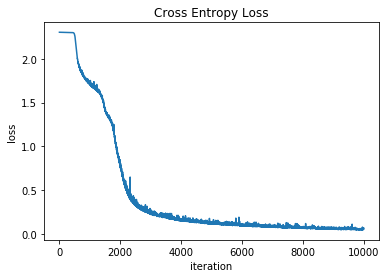

In [26]:
plt.plot(range(len(losses)), losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')

Text(0.5,1,'Model Accuracy')

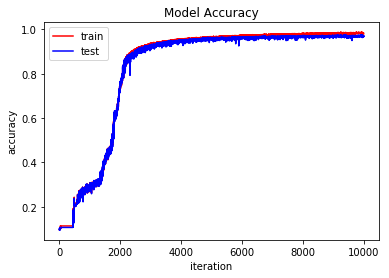

In [29]:
plt.plot(range(len(train_accs)), train_accs, 'r')
plt.plot(range(len(test_accs)), test_accs, 'b')
plt.legend(['train','test'])
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('Model Accuracy')

In [30]:
# code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[530   1   1   1   0   0   0   0   1   0]
 [  9 475   5   1   0   0   2   5   0   0]
 [  1   6 498   0   3   0   2   6   4   1]
 [  1   0   0 480   0   0   1   0   2   0]
 [  0   1   9   0 426   3   1  14   3   0]
 [  3   6   0   2   0 464   0   5   0   5]
 [  4   2   3   0   0   0 513   1   3   1]
 [  0   3   2   0   0   0   0 507   2   1]
 [  2   0   0   4   0   0   7   4 459   2]
 [  0   2   0   0   0   0   0   2   1 497]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.96 0.01 0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.01 0.96 0.   0.01 0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.93 0.01 0.   0.03 0.01 0.  ]
 [0.01 0.01 0.   0.   0.   0.96 0.   0.01 0.   0.01]
 [0.01 0.   0.01 0.   0.   0.   0.97 0.   0.01 0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.98 0.   0.  ]
 [0.   0.   0.   0.01 0.   0.   0.01 0.01 0.96 0.  ]
 [0.   0.   0.   0.   0.

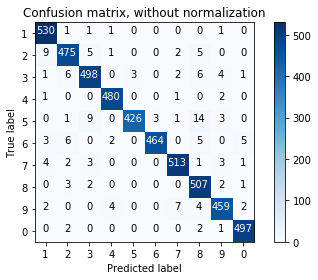

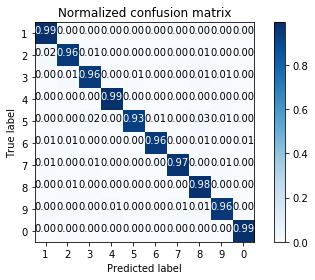

In [31]:
Z1 = W1.T * X_test.T + b1
H1 = relu(Z1)
Z2 = W2.T * H1 + b2
H2 = relu(Z2) 
Y_hat = softmax(W3.T * H2 + b3) 

cnf_matrix = confusion_matrix(np.array(prediction(Y_test.T))[0].tolist(), np.array(prediction(Y_hat))[0].tolist())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,0],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,0], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [43]:
theta = [W1,b1,W2,b2,W3,b3]
filehandler = open("nn_parameters.txt","wb")
pickle.dump(theta, filehandler, protocol = 2)
filehandler.close()